## Regression Task

#### Data preparation

In [1]:
# import libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive

Importing the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path to our CSV file
csv_file_path = '/content/drive/Shareddrives/Machine Learning/vehicles.csv'

data = []
with open(csv_file_path, 'r', errors='replace') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

df = pd.DataFrame(data[1:], columns=data[0])


Let's visualize the Dataset, its characteristic and understand our variables.
Also we are gonna clean and prepare our dataset to further analysis

In [ ]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,,,,,,...,,,,,,,az,,,
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,,,,,,...,,,,,,,ar,,,
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,,,,,,...,,,,,,,fl,,,
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,,,,,,...,,,,,,,ma,,,
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,,,,,,...,,,,,,,nc,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202706,7305220537,https://grandrapids.craigslist.org/cto/d/piers...,grand rapids,https://grandrapids.craigslist.org,2000,1984,ford,f-150,good,,...,,,,https://images.craigslist.org/00e0e_1oP7VC6liS...,This is a near rust free Ford F-150 that has b...,,mi,43.3355,-85.5134,2021-04-11T13:21:05-0400
202707,7305215212,https://grandrapids.craigslist.org/ctd/d/comst...,grand rapids,https://grandrapids.craigslist.org,15155,2011,dodge,challenger,,,...,compact,coupe,black,https://images.craigslist.org/01111_gXODrNAD29...,2011 Dodge Challenger 2dr Cpe R/T Offered ...,,mi,43.05921,-85.68897,2021-04-11T13:12:00-0400
202708,7305214545,https://grandrapids.craigslist.org/ctd/d/grand...,grand rapids,https://grandrapids.craigslist.org,28590,2017,jaguar,xf 20d premium sedan 4d,good,,...,,sedan,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,,mi,42.96,-85.65,2021-04-11T13:10:54-0400
202709,7305214533,https://grandrapids.craigslist.org/ctd/d/grand...,grand rapids,https://grandrapids.craigslist.org,41990,2020,lexus,is 350 f sport sedan 4d,good,6 cylinders,...,,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,,mi,42.96,-85.65,2021-04-11T13:10:53-0400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202711 entries, 0 to 202710
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            202711 non-null  object
 1   url           202711 non-null  object
 2   region        202711 non-null  object
 3   region_url    202711 non-null  object
 4   price         202711 non-null  object
 5   year          202711 non-null  object
 6   manufacturer  202711 non-null  object
 7   model         202711 non-null  object
 8   condition     202711 non-null  object
 9   cylinders     202711 non-null  object
 10  fuel          202711 non-null  object
 11  odometer      202711 non-null  object
 12  title_status  202711 non-null  object
 13  transmission  202711 non-null  object
 14  VIN           202711 non-null  object
 15  drive         202711 non-null  object
 16  size          202711 non-null  object
 17  type          202711 non-null  object
 18  paint_color   202711 non

We can see that the dataset has around 200k rows and 26 features.

In [ ]:
# check if there are some null data
print("Number of null data\n", df.isnull().sum())


Number of null data
 id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
county          1
state           1
lat             1
long            1
posting_date    1
dtype: int64


In [ ]:
# check for duplicated rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, url, region, region_url, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, image_url, description, county, state, lat, long, posting_date]
Index: []

[0 rows x 26 columns]


In [ ]:
# there are no duplicates value, however there are some null values
# we remove the only 4 missing value found, since they are a few and it is not worth to estimate them
df = df.dropna()

With the _describe()_ method, we can see some interesting facts about the dataset, for example count, unique value, top values or frequencies.

In [ ]:

summary_stats = df.describe(include='all')
summary_stats

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,202710,202710,202710,202710,202710,202710,202710,202710,202710,202710,...,202710,202710,202710,202710,202710,202710,202710,202710,202710,202710
unique,202710,202710,192,192,10691,107,43,19038,7,9,...,5,14,13,124774,174164,1,30,26374,26538,189049
top,7222695916,https://prescott.craigslist.org/cto/d/prescott...,orlando,https://orlando.craigslist.org,0,2017,ford,f-150,,,...,,sedan,,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,,ca,33.779214,-84.411811,
freq,1,1,2983,2983,13845,17303,32612,3510,79866,83712,...,144850,43979,59722,3294,231,202710,50614,2717,2717,48


In [ ]:

df.shape

(202710, 26)

We can see that we "lost" just one row.

In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df.describe(include="object")

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,202710,202710,202710,202710,202710,202710,202710,202710,202710,202710,...,202710,202710,202710,202710,202710,202710,202710,202710,202710,202710
unique,202710,202710,192,192,10691,107,43,19038,7,9,...,5,14,13,124774,174164,1,30,26374,26538,189049
top,7222695916,https://prescott.craigslist.org/cto/d/prescott...,orlando,https://orlando.craigslist.org,0,2017,ford,f-150,,,...,,sedan,,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,,ca,33.779214,-84.411811,
freq,1,1,2983,2983,13845,17303,32612,3510,79866,83712,...,144850,43979,59722,3294,231,202710,50614,2717,2717,48


In [ ]:
for column in df.columns:
    dtype = df[column].dtype
    print(f"{column}: {dtype}")


id: object
url: object
region: object
region_url: object
price: object
year: object
manufacturer: object
model: object
condition: object
cylinders: object
fuel: object
odometer: object
title_status: object
transmission: object
VIN: object
drive: object
size: object
type: object
paint_color: object
image_url: object
description: object
county: object
state: object
lat: object
long: object
posting_date: object


We need to convert some features from "object" type to numerical values.

In [4]:
# Convert 'year' to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Convert 'odometer' to numeric
df['odometer'] = pd.to_numeric(df['odometer'].str.replace('([^\d])', '', regex=True), errors='coerce')

# Convert 'lat' and 'long' to numeric
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['long'] = pd.to_numeric(df['long'], errors='coerce')

#errors='coerce' it's use to handle eventual errors during the conversion

# Check the data types after conversion
print(df.dtypes)

id               object
url              object
region           object
region_url       object
price            object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county           object
state            object
lat             float64
long            float64
posting_date     object
dtype: object


EDA Phase: let's start by adding some visualization of our variables and the relations between them. We are using histograms and boxplots.

In [5]:
num_col = list(df.select_dtypes(include=["int64", "float64"]).columns)
cat_col = list(df.select_dtypes(include="object").columns)

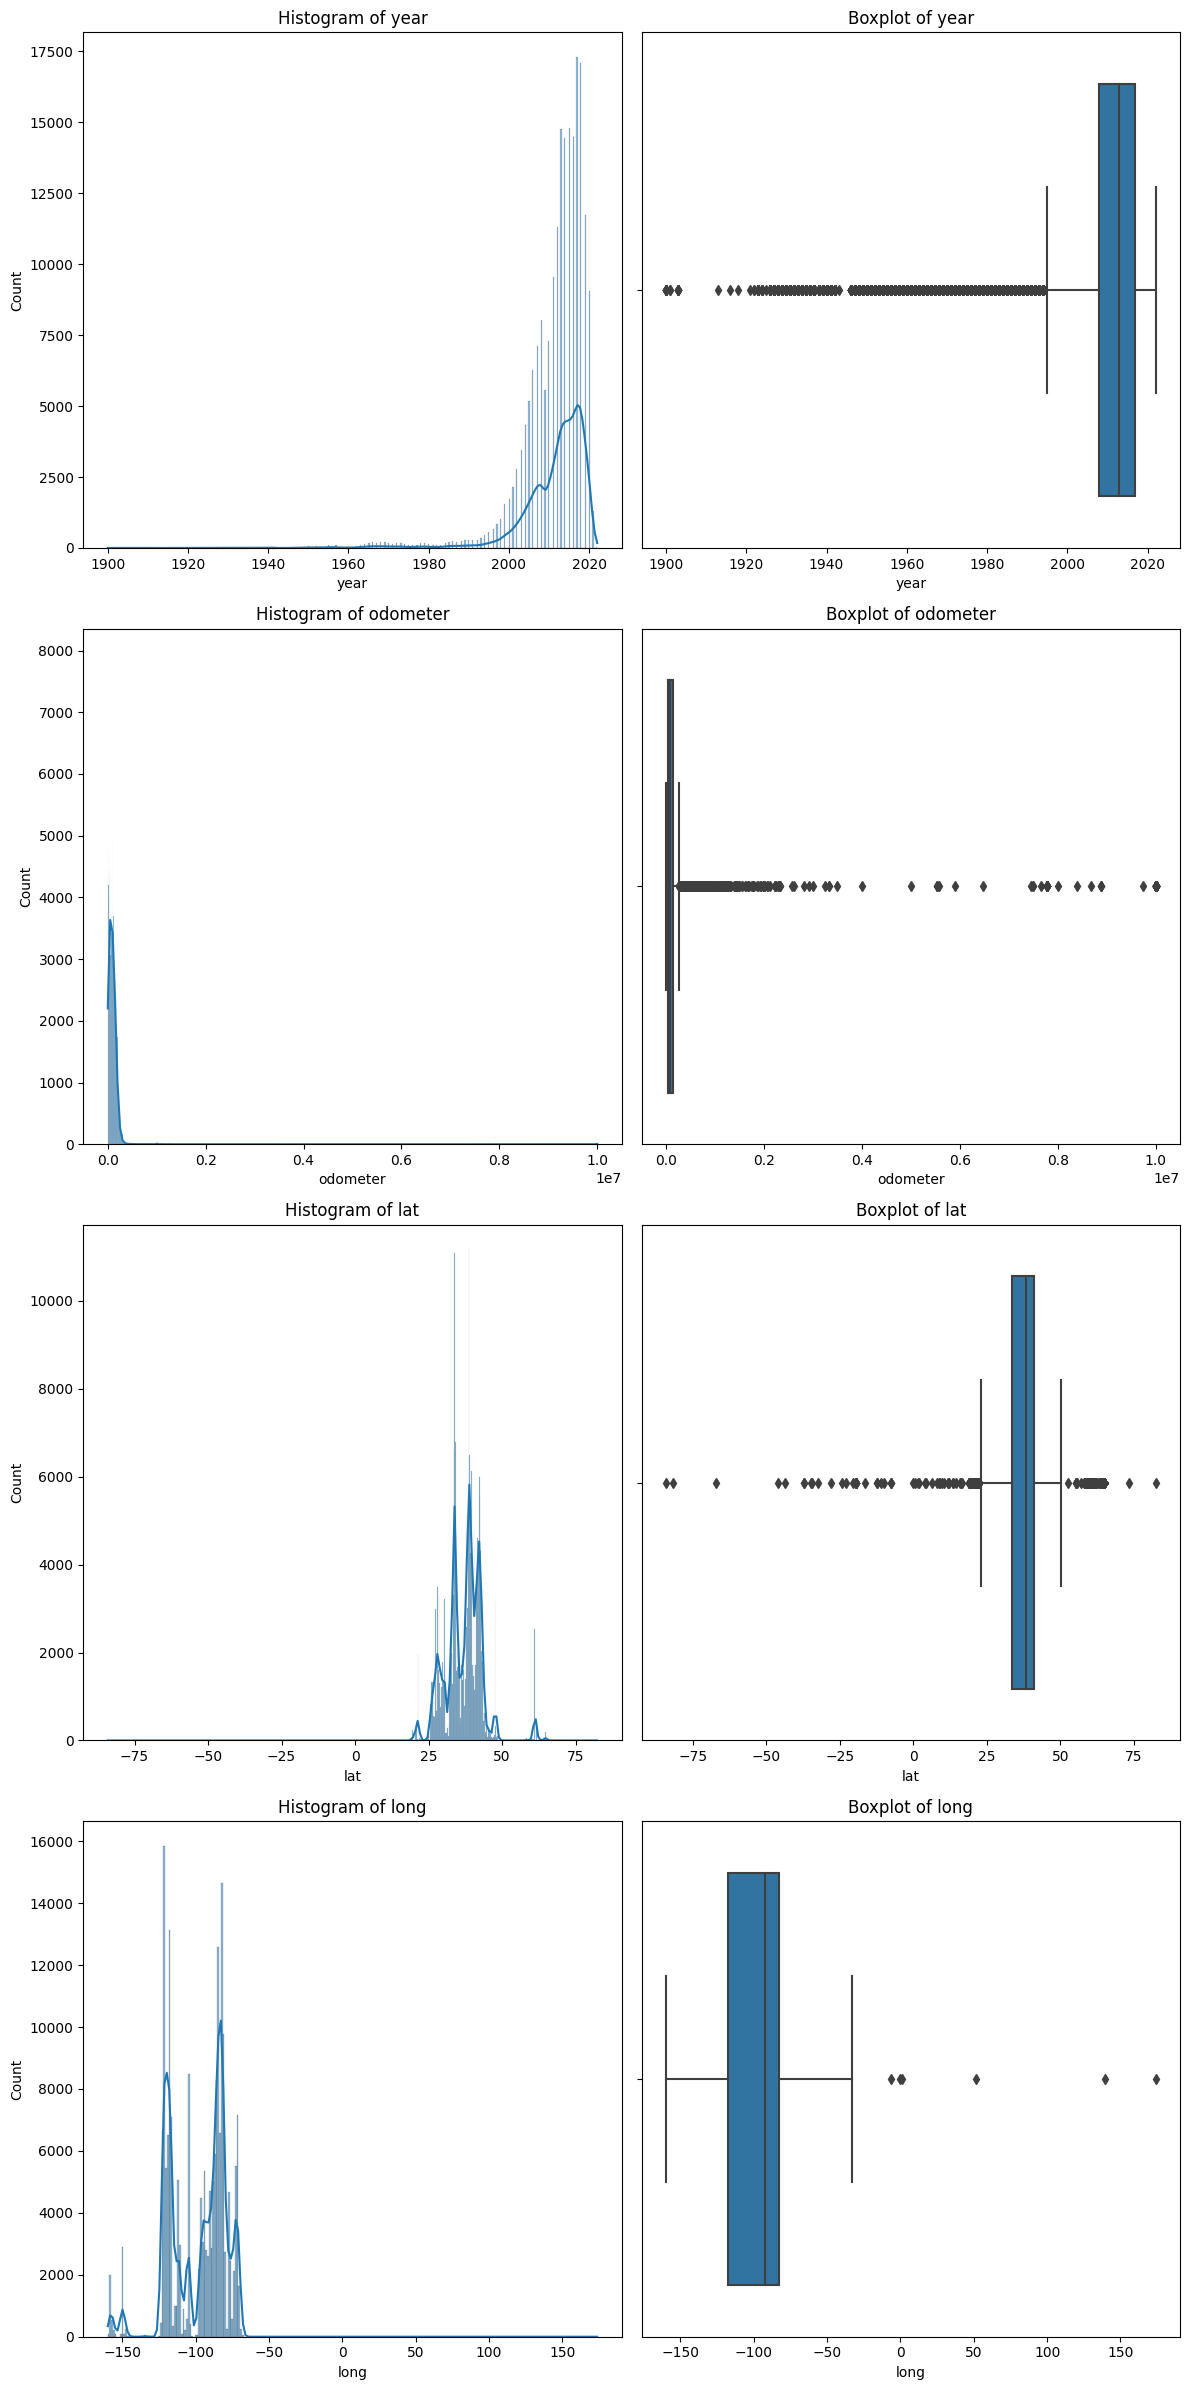

In [ ]:
fig, axes = plt.subplots(nrows=len(num_col), ncols=2, figsize=(12, 6 * len(num_col)))

# Loop through each numeric column and plot histogram and boxplot
for i, col in enumerate(num_col):
    # Plot histogram
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')

    # Plot boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()


We can see that we work with cars mostly between the years 1990 and 2020 with odometer values usually from 0 to around 200 000 miles.

From the Boxplots we can see how the outliers in our data are distributed

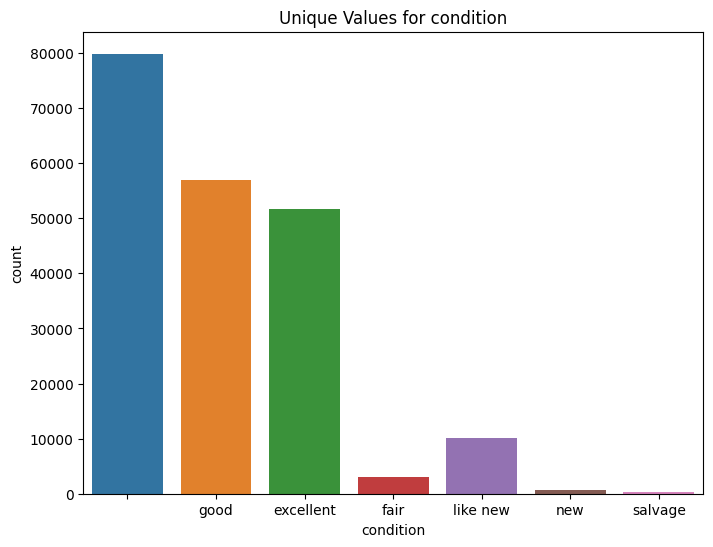

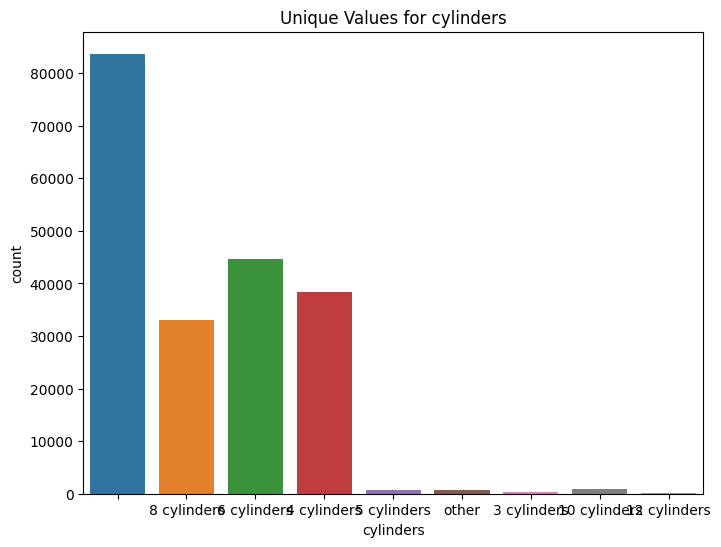

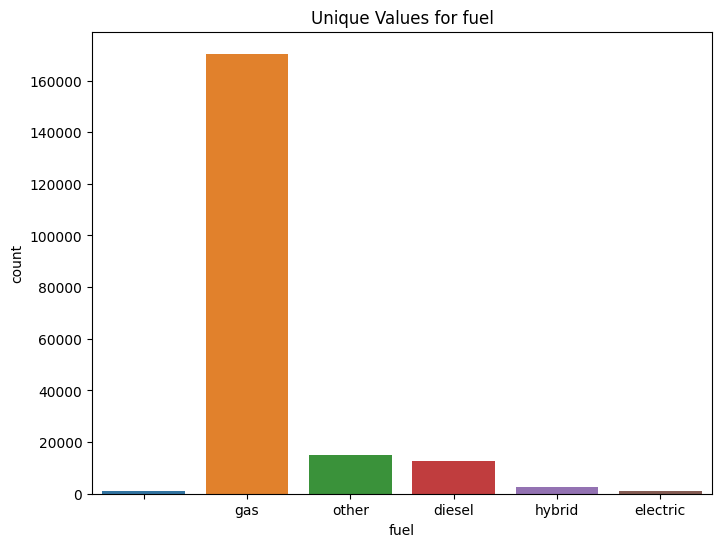

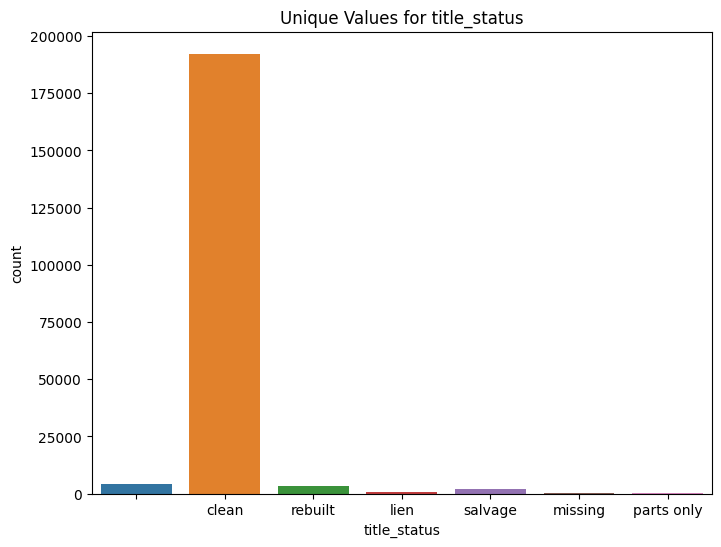

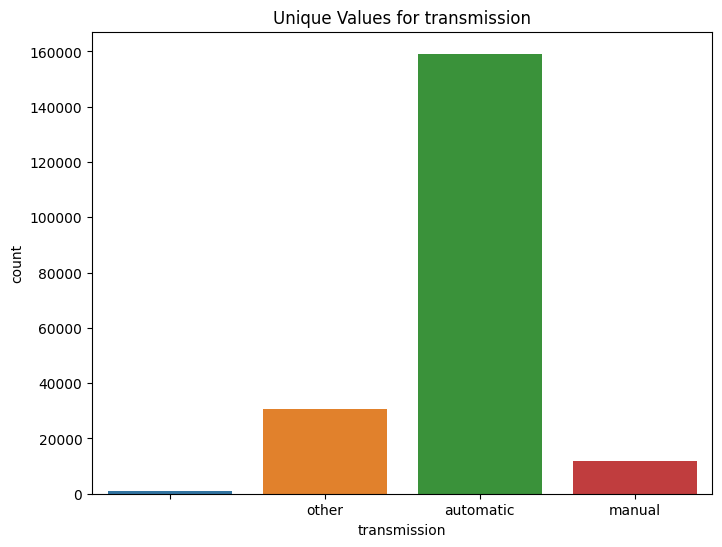

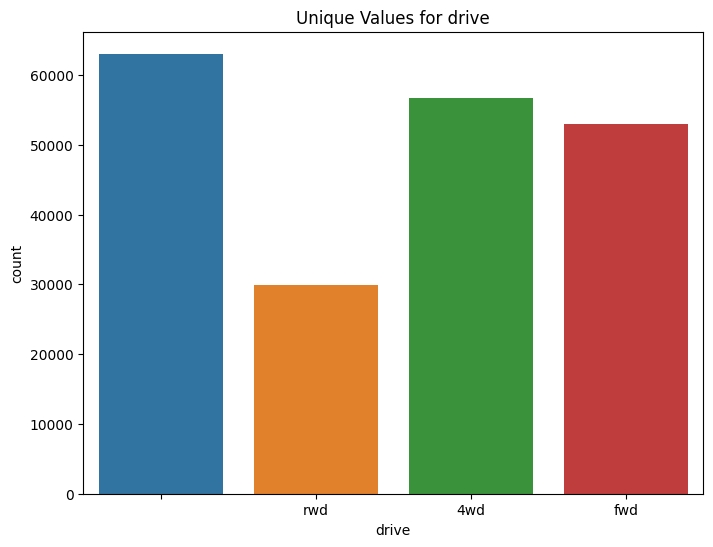

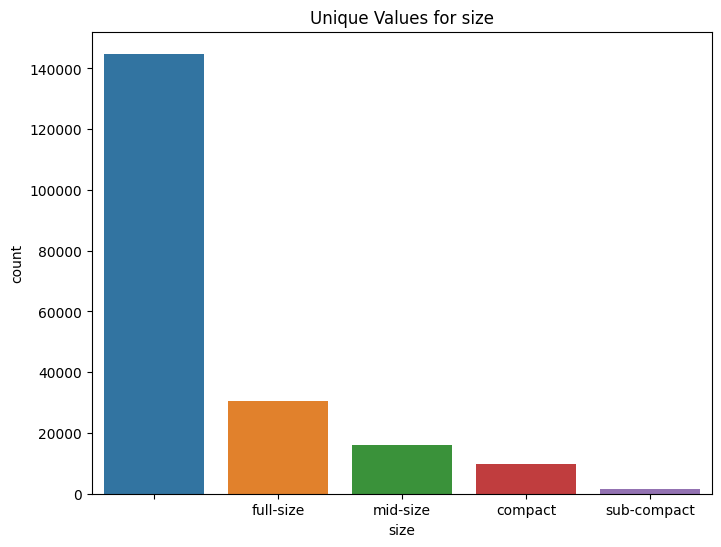

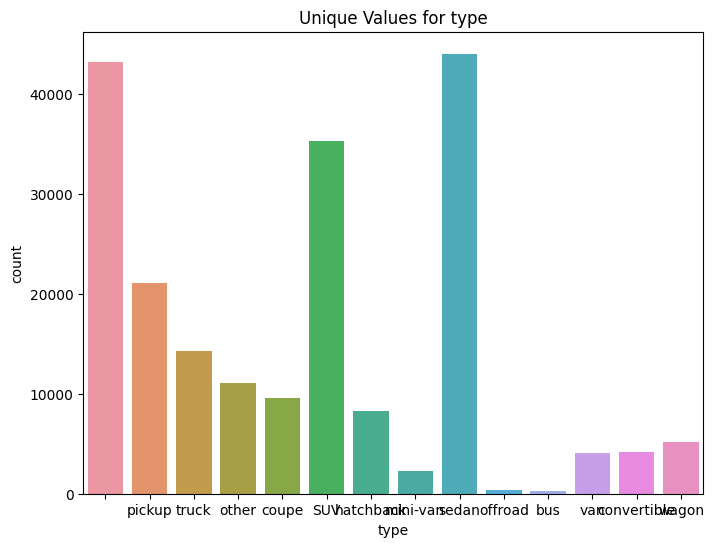

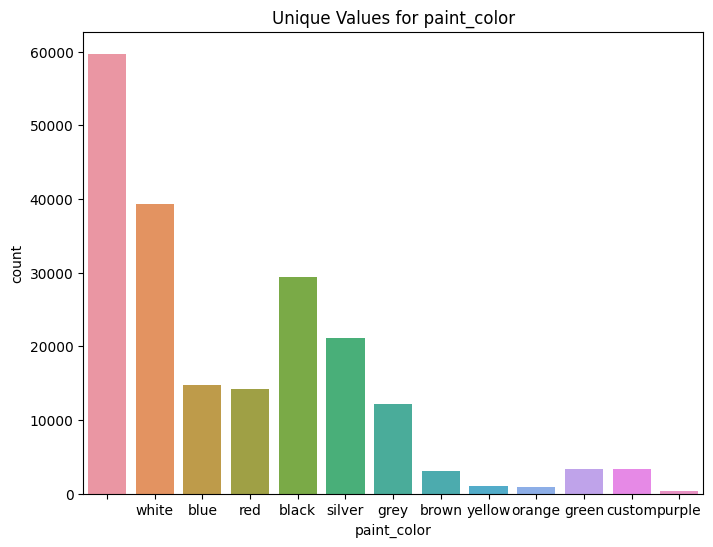

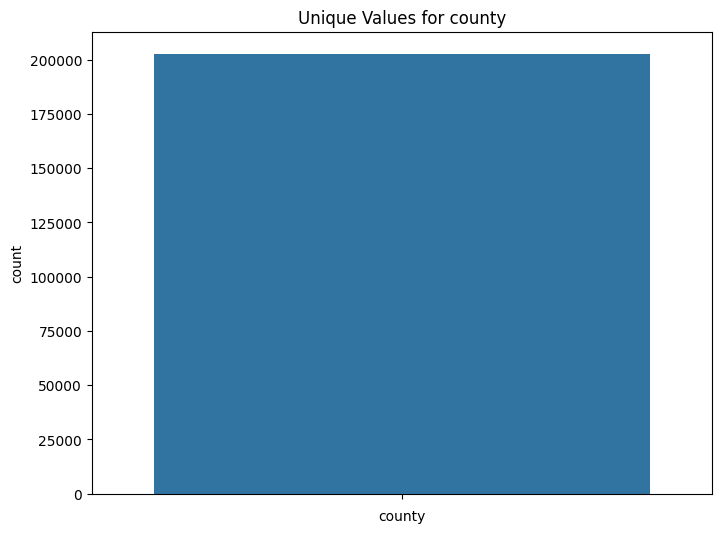

In [ ]:
for col in cat_col:
    unique_values = df[col].unique()
    num_unique_values = len(unique_values)

    if num_unique_values < 15:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df, order=unique_values)
        plt.title(f'Unique Values for {col}')
        plt.show()


We can observe that there is a lot of _empty_ categorical values.

In order to reduce the dimension of our problem and making the computations easier and faster, We remove columns that do not provide any valuable information and also the county column since it's empty.

In [6]:
df.drop(columns=["url", "region_url", "image_url","county"], inplace=True)

Focusing of our Target variable (price) we saw that it has a very skew distribution.
More over there are some clear mistakes during the transcription of the data into our dataset by hand so we are gonna remove it:

In [7]:
# let's set the treshold for price to be 50 as minimum and 1000000 as maximum

df["price"] = pd.to_numeric(df["price"], errors="coerce")
min_price = df[df["price"] < 50].index
max_price = df[df["price"] > 1000000].index
df.drop(index=min_price, axis=0, errors="ignore", inplace=True)
df.drop(index=max_price, axis=0, errors="ignore", inplace=True)

Same goes for odometer, we are gonna remove the cars with a too many miles and the one with too little (since they should be labeled as new)

In [8]:
# tresholds for odometer: 500 minimum and 300 000 maximum

low_odometer = df[(df["odometer"] < 500) & (df["condition"] != "new")].index
high_odometer = df[df["odometer"] > 300000].index
df.drop(index=low_odometer, axis=0, errors="ignore", inplace=True)
df.drop(index=high_odometer, axis=0, errors="ignore", inplace=True)

FEATURE ENGINEERING

Now we can perform a better analysis about our outliers. Usually in a normal dataset we can find some outliers, but removing them usually brings a loss of information. That results in a worse performing model so we do not apply it. In this case, since we are talking about a real dataset with real data (not a syntetic one like we usually do), it may be worth to furtherly analyze how our model performs with/without outliers using different techniques.

Feature Scaling
Feature scaling is important when we are using models with a distance metric. If our features are of different scales, they can be overcompensated in the models.
We have:
- Absolute Max Scaling
- MinMax Scaling
- Z-Score Normalization (Standard Scaler)
- Robust Scaler

The first two tecniques are not robuste so it's useless to even try it, instead Z-score normalization assume a normal distribution that is inaccurate in our case since we have the Year variable => we apply the Robust Scaler.

In [ ]:
from sklearn.model_selection import train_test_split

# split the features and the target (price)
X = df.drop('price',axis =1 )
y = df[['price']]

# divide dataset on train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler

numeric_cols = ['year', 'odometer']
df_rob = X_train.copy()

# Convert non-numeric values to NaN and then fill NaN with the median
df_rob[numeric_cols] = df_rob[numeric_cols].apply(pd.to_numeric, errors='coerce')
df_rob[numeric_cols] = df_rob[numeric_cols].fillna(df_rob[numeric_cols].median())

# Apply RobustScaler
df_rob[numeric_cols] = RobustScaler().fit_transform(df_rob[numeric_cols])


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X_train[['year', 'odometer']] = X_train[['year', 'odometer']].apply(pd.to_numeric, errors='coerce')
X_test[['year', 'odometer']] = X_test[['year', 'odometer']].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the median
X_train[['year', 'odometer']] = X_train[['year', 'odometer']].fillna(X_train[['year', 'odometer']].median())
X_test[['year', 'odometer']] = X_test[['year', 'odometer']].fillna(X_test[['year', 'odometer']].median())

# model without rescaling
rf_no_scaling = RandomForestRegressor(n_estimators=100, random_state=42)
rf_no_scaling.fit(X_train[['year', 'odometer']], y_train)
pred_no_scaling = rf_no_scaling.predict(X_test[['year', 'odometer']])

# model using Robust Scaler
rf_rob = RandomForestRegressor(n_estimators=100, random_state=42)
rf_rob.fit(df_rob[['year', 'odometer']], y_train)
pred_rob = rf_rob.predict(X_test[['year', 'odometer']])


<ipython-input-23-06ef2849ee2a>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_no_scaling.fit(X_train[['year', 'odometer']], y_train)
<ipython-input-23-06ef2849ee2a>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_rob.fit(df_rob[['year', 'odometer']], y_train)


In [ ]:
print('No Scaling: %.3f' % mean_absolute_error(y_test,pred_no_scaling))
print('Robust Scaler Score: %.3f' % mean_absolute_error(y_test,pred_rob))


No Scaling: 5203.541
Robust Scaler Score: 11019.798


Since our results are better without scaling we are gonna keep it like this. Since we're very worried about the outliers in this dataset and we want to be 100% sure about it before starting to train our model, we want to see how it performs if we apply a log transformation to the skewed variables.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


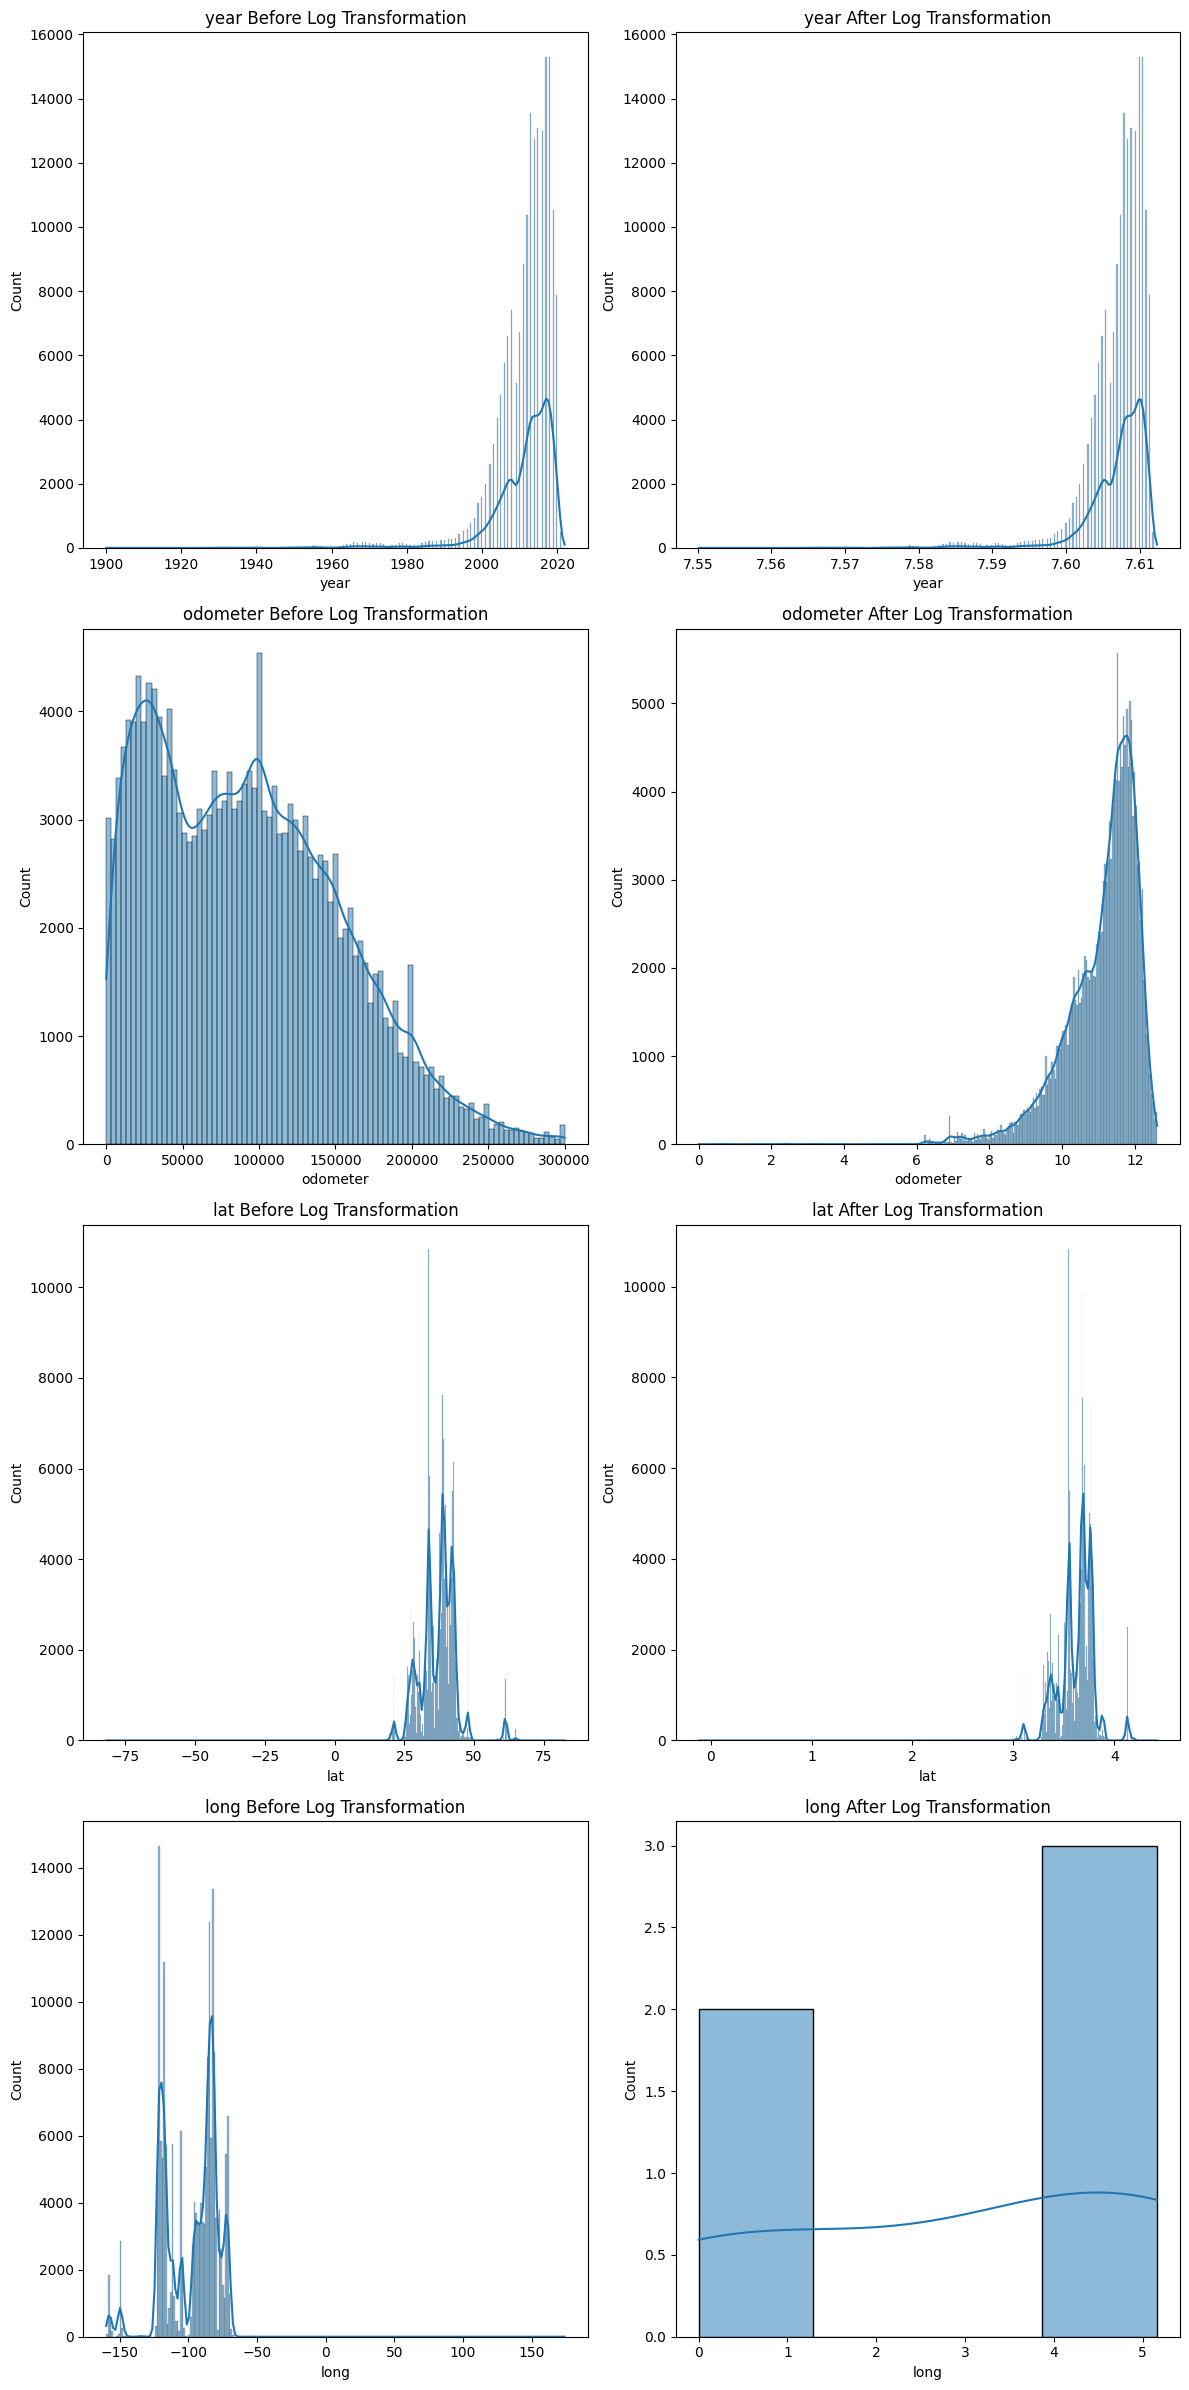

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_log_transformed = df.copy()

# Apply log transformation to all numeric columns with a small constant (e.g., 1e-8) since the log of 0 will give us a NAN value and the model will give us an erro
df_log_transformed[num_col] = df_log_transformed[num_col].apply(lambda x: np.log1p(x + 1e-8))

# Plot the distributions before and after log transformation
fig, axes = plt.subplots(nrows=len(num_col), ncols=2, figsize=(12, 6 * len(num_col)))

for i, col in enumerate(num_col):
    # Plot before log transformation
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Before Log Transformation')

    # Plot after log transformation
    sns.histplot(df_log_transformed[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} After Log Transformation')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model on the original dataset
rf_original = RandomForestRegressor(n_estimators=100, random_state=42)
rf_original.fit(X_train[['year', 'odometer']], y_train)
pred_original = rf_original.predict(X_test[['year', 'odometer']])
mae_original = mean_absolute_error(y_test, pred_original)

# Train Random Forest model on the log-transformed dataset
X_train_log = X_train.copy()
X_test_log = X_test.copy()

# Apply log transformation
X_train_log[['odometer']] = X_train_log[['odometer']].apply(np.log1p)
X_test_log[['odometer']] = X_test_log[['odometer']].apply(np.log1p)

rf_log_transformed = RandomForestRegressor(n_estimators=100, random_state=42)
rf_log_transformed.fit(X_train_log[['year', 'odometer']], y_train)
pred_log_transformed = rf_log_transformed.predict(X_test_log[['year', 'odometer']])
mae_log_transformed = mean_absolute_error(y_test, pred_log_transformed)

# Print Mean Absolute Errors
print(f'MAE on Original Dataset: {mae_original:.3f}')
print(f'MAE on Log-Transformed Dataset: {mae_log_transformed:.3f}')


<ipython-input-26-491b5f29fc90>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_original.fit(X_train[['year', 'odometer']], y_train)
<ipython-input-26-491b5f29fc90>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_log_transformed.fit(X_train_log[['year', 'odometer']], y_train)


MAE on Original Dataset: 5203.541
MAE on Log-Transformed Dataset: 5206.693


The results are more or less the same, since we don't have any improvement we'll keep the original dataset.
Just to clarify we used the Random Forest Regressor since it usually outperform all the basic models (only Bootstrap method are better, but it would've taken even more time)

CORRELATION MATRIX

<ipython-input-27-c5fbf9be1328>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


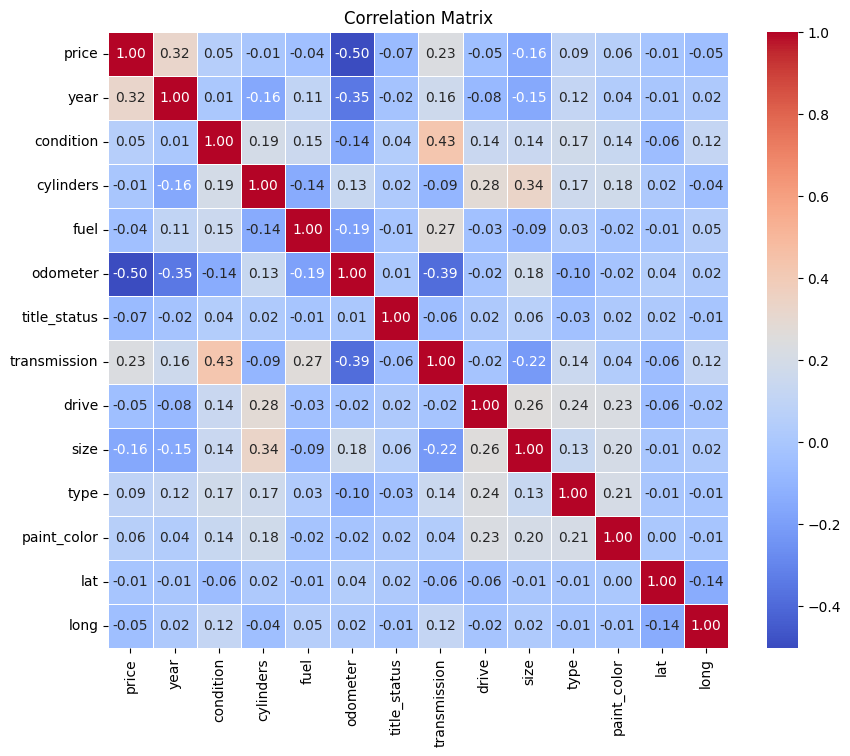

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns
cols_to_label_encode = [col for col in categorical_cols if df[col].nunique() < 15]

df_encoded = df.copy()

label_encoder = LabelEncoder()
for col in cols_to_label_encode:
    df_encoded[col] = label_encoder.fit_transform(df[col])

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Most significant relations related to _price_ are _year_ and _odometer_ which is not surprising. No other important relation to furtherly analyze.

DUPLICATE VALUES

In [ ]:
print("Number of duplicated data ", df.duplicated().sum())

Number of duplicated data  0


Despite the value of duplied data seams 0 we found a problem about the VIN variable, let's get into it

In [ ]:
df["VIN"].value_counts()

                     68515
1FMJU1JT1HEA52352      118
3C6JR6DT3KG560649      112
1GCHTCE37G1186784      101
5TFTX4CN3EX042751       98
                     ...  
WBAFU9C51BC783337        1
WBA3C1C5XDF444049        1
JTMWFREVXFJ034466        1
JN1AR5EF9GM290250        1
2B3CJ5DTXBH604375        1
Name: VIN, Length: 57277, dtype: int64

As we can see, there are cars that have supposedly been "sold" 118 times. This indicates that the professional seller has posted the same advertisement in each of the regions or states to maximize visibility for the ad.
Therefore, using the manufacturer, model, price, year, and VIN as reference values, we will proceed to remove all duplicates we find:

In [9]:
df.drop_duplicates(subset=["price", "year", "manufacturer", "model", "VIN"], keep="first", inplace=True)


FOCUS ON: PRICE vs YEAR relation

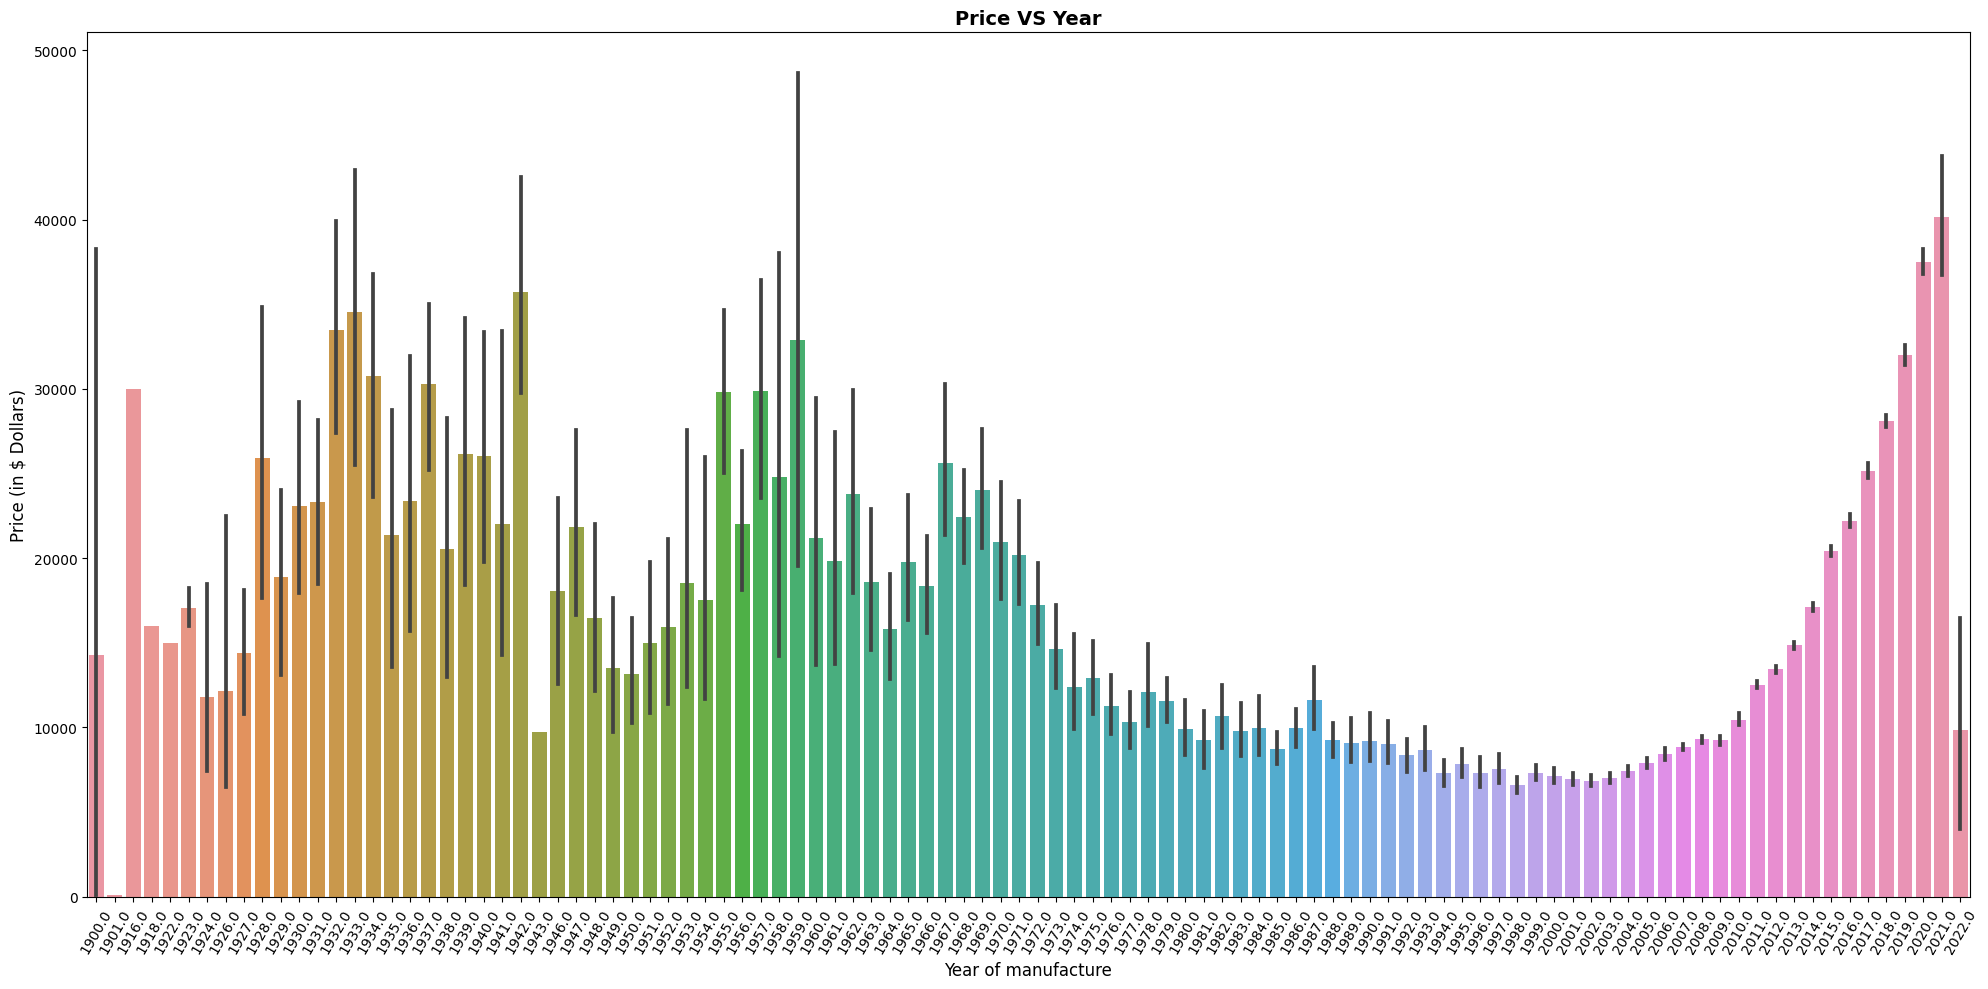

In [ ]:
sns.set_palette('summer_r')
plt.figure(figsize =(20,10))
sns.barplot(data=df, y='price',x='year')
plt.title("Price VS Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year of manufacture',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()



Looking at the relation between price and year we can clearly see how the Car Market work. After a certain year (just by looking we would say 1974) we take more concern about the originality, rarity and such characteristic of old cars, that's why we need to divide our analysis in two group: classics and nowadays cars

Post 1976

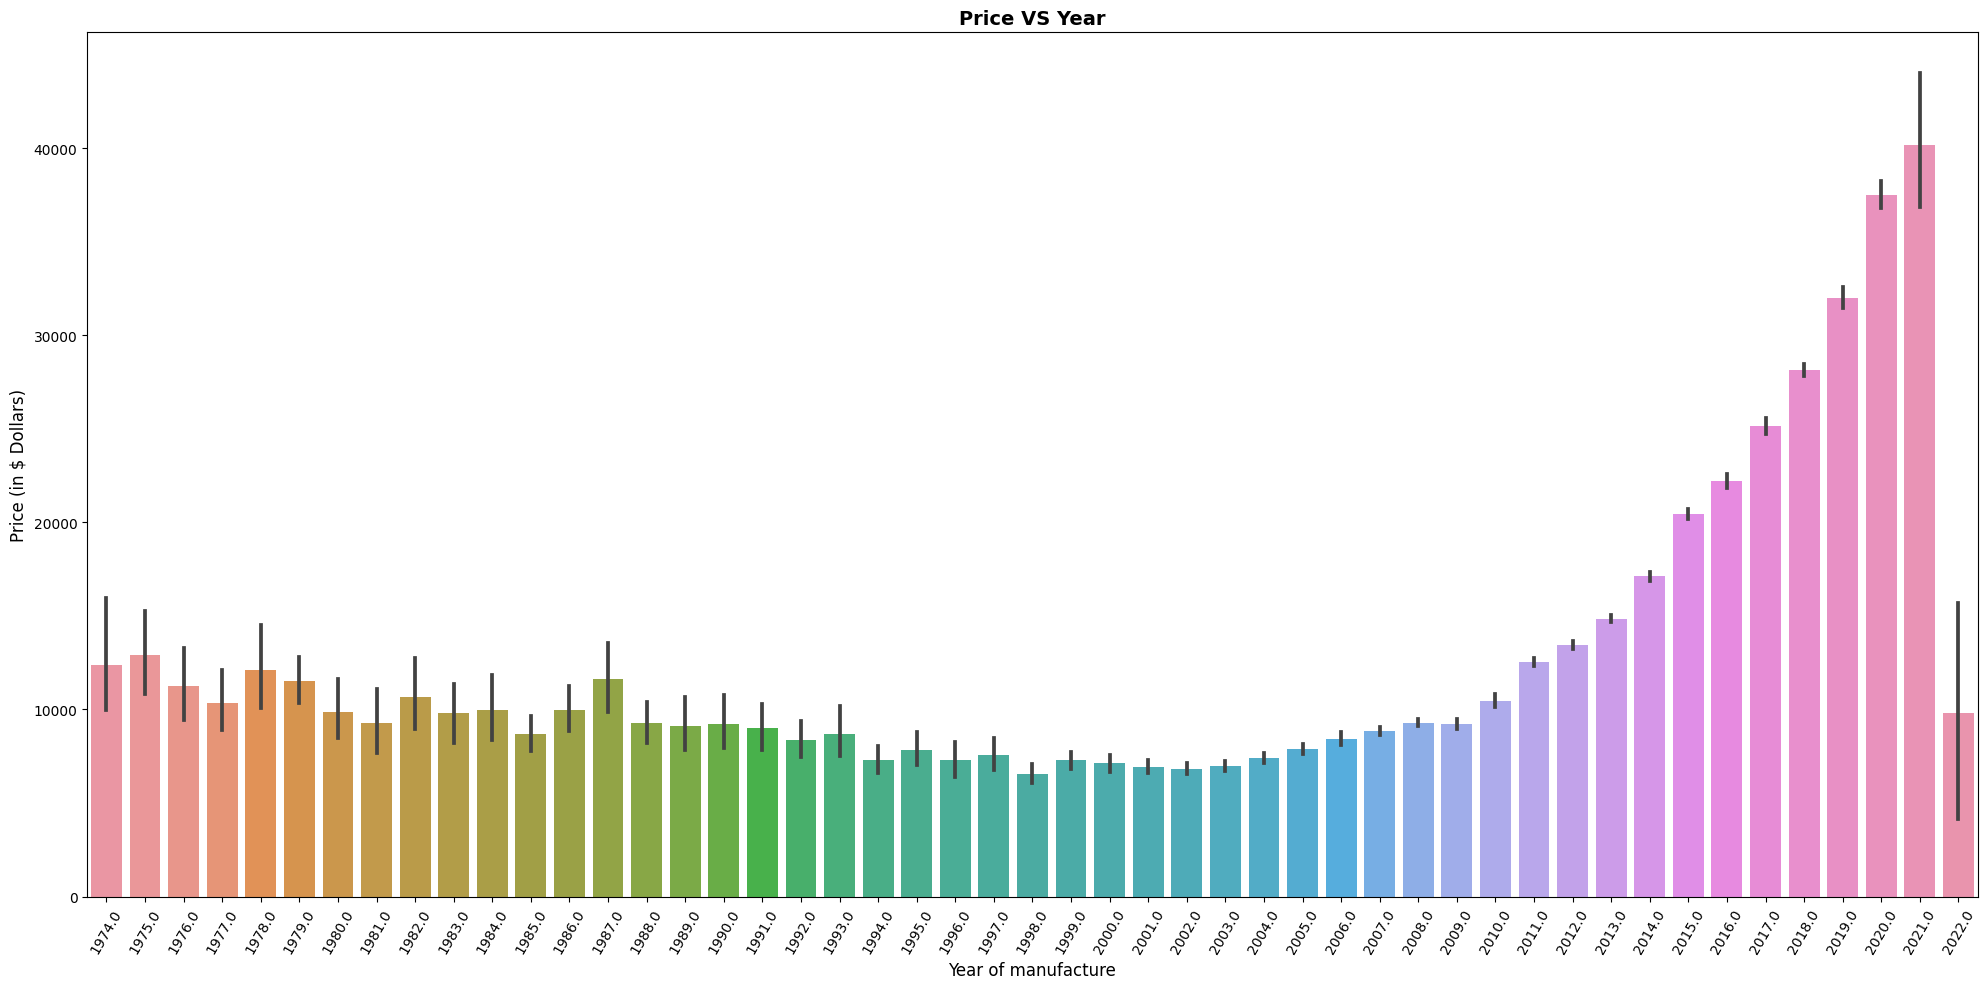

In [ ]:

sns.set_palette('summer_r')
plt.figure(figsize =(20,10))
sns.barplot(data=df[df["year"] >= 1974], y='price',x='year')
plt.title("Price VS Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year of manufacture',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

Let's see the correlation matrix for this subset of the dataset.

<ipython-input-33-e821674314f9>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


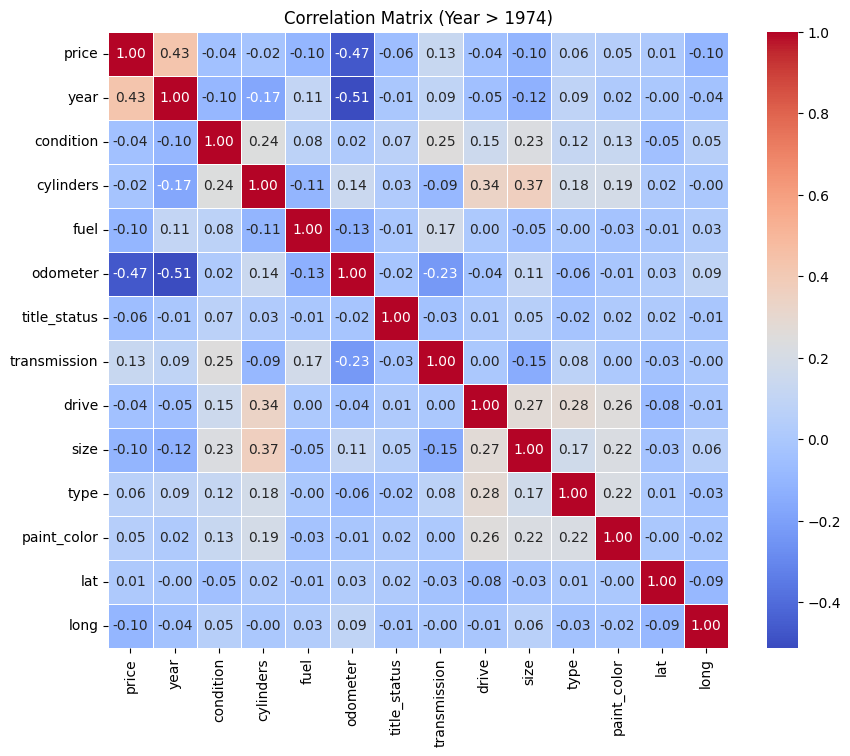

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_filtered = df[df['year'] > 1974]

categorical_cols = df_filtered.select_dtypes(include='object').columns
cols_to_label_encode = [col for col in categorical_cols if df_filtered[col].nunique() < 15]

df_encoded = df_filtered.copy()

label_encoder = LabelEncoder()
for col in cols_to_label_encode:
    df_encoded[col] = label_encoder.fit_transform(df_filtered[col])

correlation_matrix = df_encoded.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Year > 1974)")
plt.show()


Pre 1976

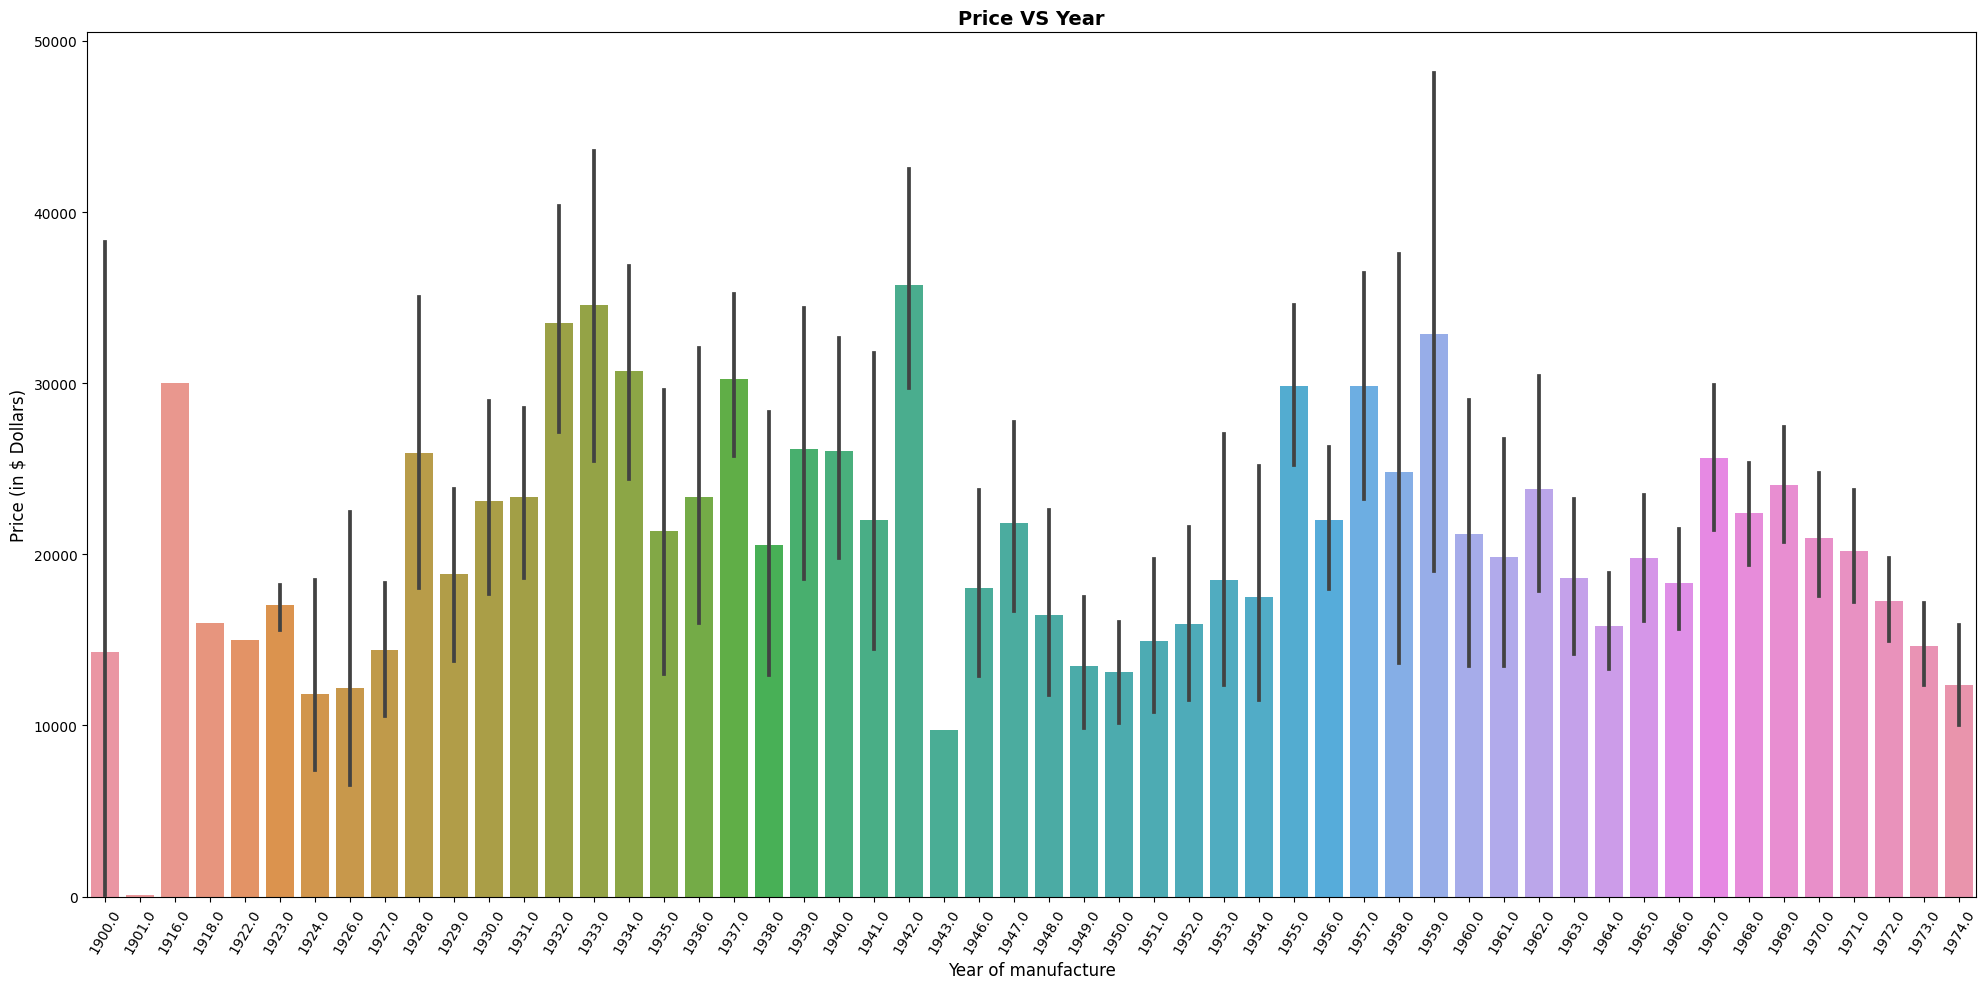

In [ ]:
sns.set_palette('summer_r')
plt.figure(figsize =(20,10))
sns.barplot(data=df[df["year"] <= 1974], y='price',x='year')
plt.title("Price VS Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year of manufacture',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

In [10]:
df_filtered = df[df['year'] < 1974]

categorical_cols = df_filtered.select_dtypes(include='object').columns
cols_to_label_encode = [col for col in categorical_cols if df_filtered[col].nunique() < 15]

df_encoded = df_filtered.copy()

label_encoder = LabelEncoder()
for col in cols_to_label_encode:
    df_encoded[col] = label_encoder.fit_transform(df_filtered[col])

correlation_matrix = df_encoded.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Year > 1974)")
plt.show()


NameError: ignored

It's even more clear looking at the Correlation Matrix: by dividing our dataset into two epochs we have two complitely different relations, that's why while performing our model we'll remove every rows where the year is fewer than 1974

In [11]:
df_filtered = df[df['year'] > 1974]

FOCUS ON: Price vs Odometer

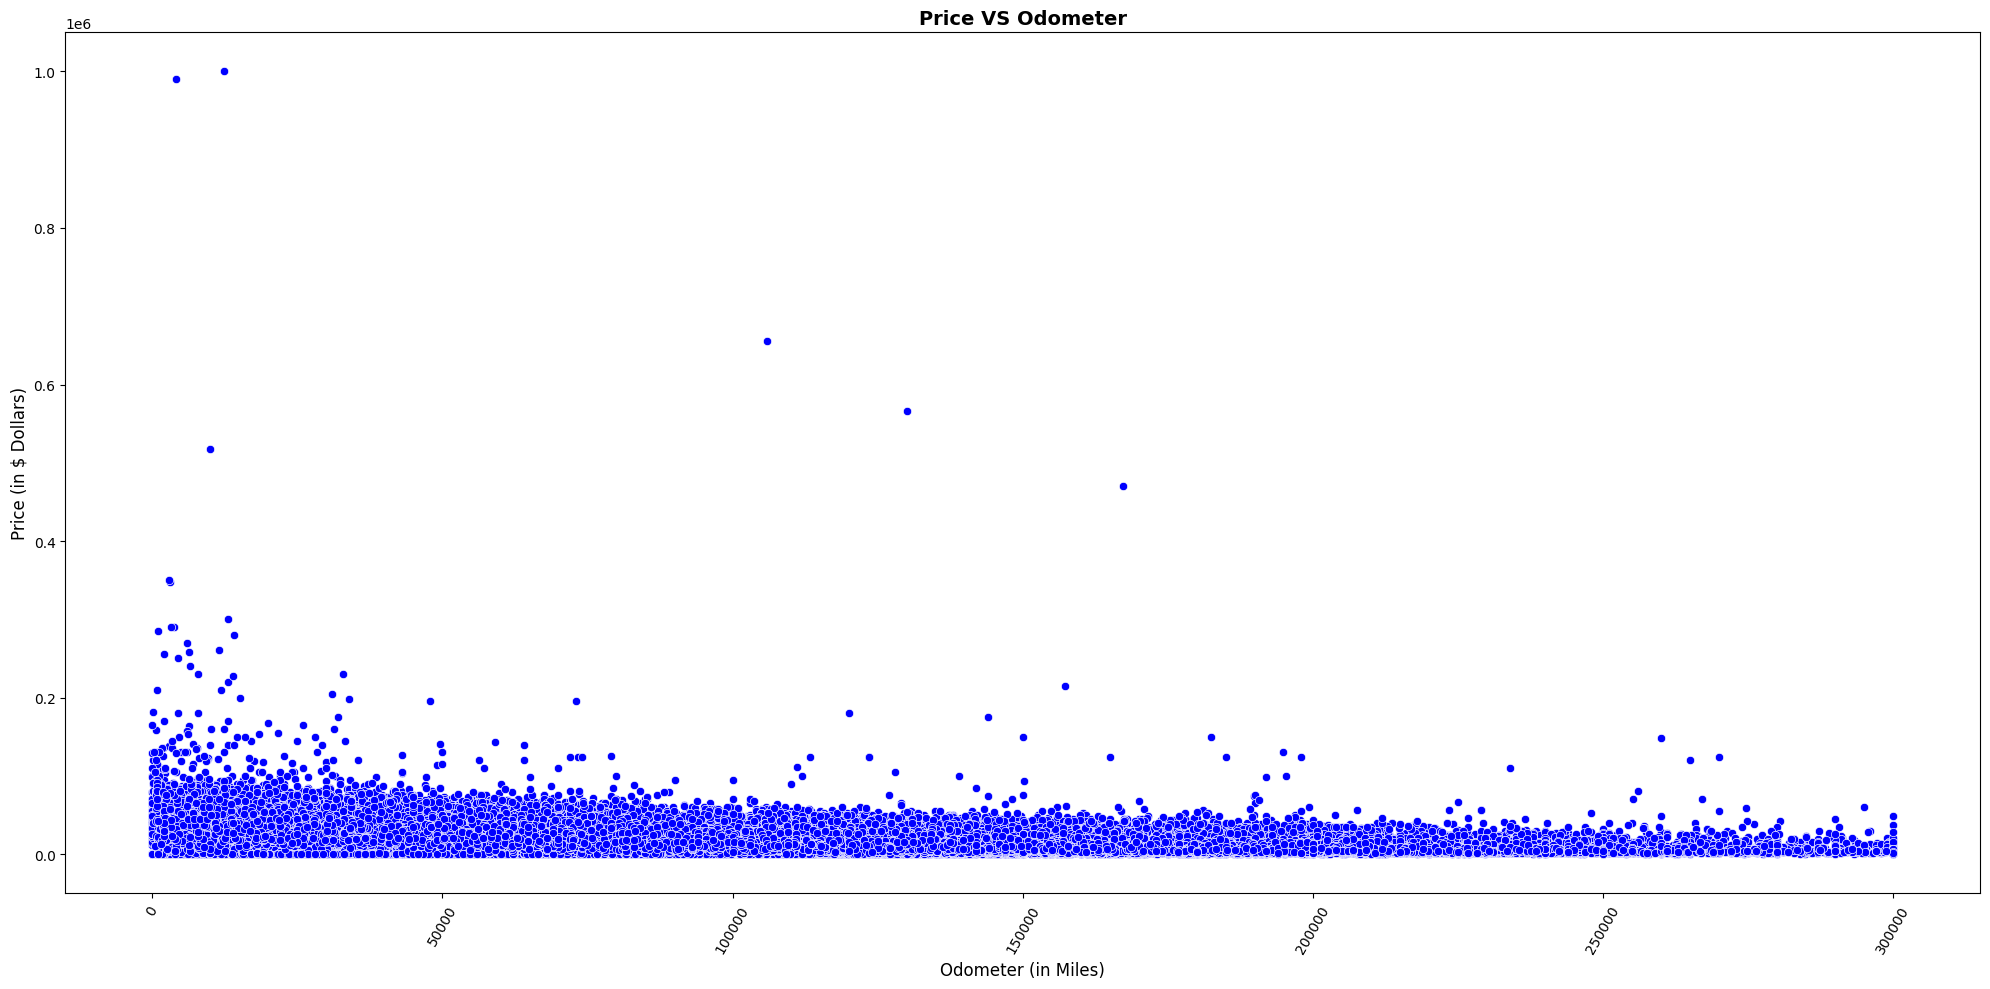

In [ ]:
plt.figure(figsize =(20,10))
sns.scatterplot(data=df_filtered, y='price',x='odometer', color="blue")
plt.title("Price VS Odometer",fontsize=14,fontweight ='bold')
plt.xlabel('Odometer (in Miles)',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

Preparation for our Model:

In [12]:
# remove columns that do not give us useful info
columns_to_remove = ['id', 'VIN', 'description', 'lat', 'long', 'posting_date']
df_filtered = df_filtered.drop(columns=columns_to_remove)
df = df.drop(columns=columns_to_remove)


In [ ]:
df_filtered

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,,,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,,,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,,,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,,,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202699,grand rapids,14900,2012.0,chevrolet,camaro,excellent,6 cylinders,gas,94000.0,clean,automatic,rwd,,convertible,black,mi
202700,grand rapids,10500,2013.0,bmw,x1 awd 4dr xdrive28i,excellent,4 cylinders,gas,107763.0,clean,automatic,4wd,,hatchback,orange,mi
202705,grand rapids,16000,2013.0,toyota,venza limited awd,excellent,6 cylinders,gas,91534.0,clean,automatic,fwd,mid-size,SUV,black,mi
202706,grand rapids,2000,1984.0,ford,f-150,good,,gas,100000.0,clean,manual,,,,,mi


We can see that we reduced the dimension of the problem from 26 columns to 16 colums. Of course it is a partial lose of information, but we believe that not a significant one.

In [ ]:
data_types = df_filtered.dtypes
print("Data Types:")
print(data_types)

Data Types:
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


In [13]:
common_columns = df.columns.intersection(df_filtered.columns)  # Get common columns

# Update df to only include common columns
df = df[common_columns]


We use LabelEncoder to transform the categorical variables into numerical to run our model. Usually we prefer to use Dummies because the Label Method give us an "order" that in reality doesn't exist but in this case using the Dummy method means having more than 1500 variables so our model would be too heavy.

In [14]:
from sklearn.preprocessing import LabelEncoder
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df_filtered.columns.values.tolist()
for col in features:
    if df_filtered[col].dtype in numerics: continue
    categorical_columns.append(col)
for col in categorical_columns:
    if col in df_filtered.columns:
        le = LabelEncoder()
        le.fit(list(df_filtered[col].astype(str).values))
        df_filtered[col] = le.transform(list(df_filtered[col].astype(str).values))


In [15]:
from sklearn.preprocessing import LabelEncoder
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
for col in categorical_columns:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        df[col] = le.transform(list(df[col].astype(str).values))

In [ ]:
df = df.dropna()
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,8,33590,2014.0,15,14269,3,7,3,57923.0,1,3,0,0,9,11,1
28,8,22590,2010.0,8,14498,3,7,3,71229.0,1,3,0,0,9,2,1
29,8,39590,2020.0,8,14521,3,7,3,19160.0,1,3,0,0,9,9,1
30,8,30990,2017.0,40,16338,3,7,3,41124.0,1,3,0,0,9,9,1
31,8,15000,2013.0,14,8196,1,6,3,128000.0,1,1,3,2,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202699,64,14900,2012.0,8,5203,1,6,3,94000.0,1,1,3,0,3,1,22
202700,64,10500,2013.0,5,16898,1,4,3,107763.0,1,1,1,0,5,7,22
202705,64,16000,2013.0,40,16544,1,6,3,91534.0,1,1,2,3,1,1,22
202706,64,2000,1984.0,14,8043,3,0,3,100000.0,1,2,0,0,0,0,22


In [ ]:
nan_counts = df_filtered.isna().sum()
print("NaN Counts:")
print(nan_counts)


NaN Counts:
region            0
price             0
year              0
manufacturer      0
model             0
condition         0
cylinders         0
fuel              0
odometer        660
title_status      0
transmission      0
drive             0
size              0
type              0
paint_color       0
state             0
dtype: int64


In [16]:
df_filtered = df_filtered.dropna(subset=['odometer'])
df = df.dropna(subset=['odometer'])

any_nan_after_removal = df_filtered.isna().any().any()
any_nan_after_removal2 = df.isna().any().any()

print("Any NaN Values After Removal:", any_nan_after_removal)
print("Any NaN Values After Removal2:", any_nan_after_removal2)

#I forgot to remove the rows when I removed the outliers from odometer

Any NaN Values After Removal: False
Any NaN Values After Removal2: True


### Regression

Types of reggresion examined in this part:
- Linear
- RandomForrestRegressor
- Polynomial
- Support vector machine
- Stochastic gradient descent

#### 1. Linear Regression

First we will try to use the linear regression which is a fast and interpretable way how to perform regression. The disadvantage however is that it assumes a linear relationship between the independent variables and the target variable which can result in inaccurateness.tučný text

In [35]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
predictions = model.predict(X_test)

# compute metrics
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))


print("Mean Squared Error:", mse)
print("R-squared:", r_squared)
print("mean_absolute_error ", mae)
print("Root Mean Squared Error", rmse)

Mean Squared Error: 204347831.55998525
R-squared: 0.2761941077688832
mean_absolute_error  7630.385498082568
Root Mean Squared Error 14295.028211234327


Since R-squared is around 32%, the model does not explain much of the variance in the dependent variable and might not be suitable for making predictions.

#### 2. Random Forrest Regressor
Now we try to use the Random Forest Regressor because it is suitable for predicting continuous numeric values, making it suitable for regression problems such as predicting prices which is our case.

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use the random forest regressor
# TODO: USE THE BEST PARAMS OBTAINED FROM PREVIOUS SECTION!!
model = RandomForestRegressor(n_estimators=500, random_state=42, bootstrap=True)
model.fit(X_train, y_train)

# predict
predictions = model.predict(X_test)

# compute metrics
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)
print("mean_absolute_error ", mae)
print("Root Mean Squared Error", rmse)

We can see that now we are getting better results in R-squared metric.


#### 3. Polynomial Regression

If there are nonlinear relationships between features and the target variable by introducing polynomial terms, we might be able to achieve good results with this method.

In [36]:
# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Degree of the polynomial // TO BE DETERMINED WITH SOME PARAM TUNER (OPTUNA)
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Creating and fitting the Polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# predict
predictions = model.predict(X_test_poly)

# compute metrics
mse_pl = mean_squared_error(y_test, predictions)
r_squared_pl = r2_score(y_test, predictions)
mae_pl = mean_absolute_error(y_test,predictions)
rmse_pl = np.sqrt(mean_squared_error(y_test,predictions))


print("Mean Squared Error:", mse_pl)
print("R-squared:", r_squared_pl)
print("mean_absolute_error ", mae_pl)
print("Root Mean Squared Error", rmse_pl)

Mean Squared Error: 169825969.84814182
R-squared: 0.39847153409178115
mean_absolute_error  5920.40433775554
Root Mean Squared Error 13031.729349865343


We can see that there is an improvement compared to just the Linear regression but the results are not as good as in case of Random Forest Regression.

#### 4. Support Vector Machines (SVM)

SVM Regression can capture nonlinear relationships and is effective in high-dimensional spaces which is our case becuase we have many features. Usually there is a drawback in its long computation run, but the results are often very good.

We use rbf as kernel because it is useful for non-linear relationships. We also need to scale the features so that they contribute equally to the computation.

In [37]:
# import libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='rbf')  # rbf kernel for non-linear relationships
model.fit(X_train_scaled, y_train)

# predict
predictions = model.predict(X_test_scaled)

# evaluate metrics
mse_svm = mean_squared_error(y_test, predictions)
r_squared_svm = r2_score(y_test, predictions)
mae_svm = mean_absolute_error(y_test,predictions)
rmse_svm = np.sqrt(mean_squared_error(y_test,predictions))


print("Mean Squared Error:", mse_svm)
print("R-squared:", r_squared_svm)
print("mean_absolute_error ", mae_svm)
print("Root Mean Squared Error", rmse_svm)

Mean Squared Error: 273556891.92183137
R-squared: 0.03105362693643321
mean_absolute_error  9098.544764407008
Root Mean Squared Error 16539.555372555555


OK, this does not seem good. Let's change the kernel type to poly.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='poly', degree=3)  # rbf kernel for non-linear relationships
model.fit(X_train_scaled, y_train)

# predict
predictions = model.predict(X_test_scaled)

# evaluate metrics
mse_svm_pl = mean_squared_error(y_test, predictions)
r_squared_svm_pl = r2_score(y_test, predictions)
mae_svm_pl = mean_absolute_error(y_test,predictions)
rmse_svm_pl = np.sqrt(mean_squared_error(y_test,predictions))


print("Mean Squared Error:", mse_svm_pl)
print("R-squared:", r_squared_svm_pl)
print("mean_absolute_error ", mae_svm_pl)
print("Root Mean Squared Error", rmse_svm_pl)

Mean Squared Error: 274991442.81959677
R-squared: 0.025972406428334982
mean_absolute_error  9159.062673327306
Root Mean Squared Error 16582.865941072934


Ok still bad. Let's try linear kernel since the linear regression had a
bigger success.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='linear', C=10)  # rbf kernel for linear relationships
model.fit(X_train_scaled, y_train)

# predict
predictions = model.predict(X_test_scaled)

# evaluate metrics
mse_svm_lm = mean_squared_error(y_test, predictions)
r_squared_svm_lm = r2_score(y_test, predictions)
mae_svm_lm = mean_absolute_error(y_test,predictions)
rmse_svm_lm = np.sqrt(mean_squared_error(y_test,predictions))


print("Mean Squared Error:", mse_svm_lm)
print("R-squared:", r_squared_svm_lm)
print("mean_absolute_error ", mae_svm_lm)
print("Root Mean Squared Error", rmse_svm_lm)

Mean Squared Error: 214066474.01692292
R-squared: 0.24177039687790625
mean_absolute_error  7351.838316279684
Root Mean Squared Error 14631.010697040821


Let's try to tune the 'C' parameter, by default 1.0.

Recap:
- Smaller C value allows for a wider margin => potentially misclassifying some training points.
- Larger C value emphasizes classifying all training data correctly => potentially leading to overfitting.

### 5. SGDRegressor

We can also try to use SGDRegressor, a linear model that uses stochastic gradient descent for training. Again, scaling is necessary.

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature scaling (important for SGD)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDRegressor(max_iter=100000, random_state=42)
model.fit(X_train_scaled, y_train)

# predict
predictions = model.predict(X_test_scaled)

# evaluate metrics
mse_sdg = mean_squared_error(y_test, predictions)
r_squared_sdg = r2_score(y_test, predictions)
mae_sdg = mean_absolute_error(y_test,predictions)
rmse_sdg = np.sqrt(mean_squared_error(y_test,predictions))


print("Mean Squared Error:", mse_sdg)
print("R-squared:", r_squared_sdg)
print("mean_absolute_error ", mae_sdg)
print("Root Mean Squared Error", rmse_sdg)

Mean Squared Error: 204687144.30369055
R-squared: 0.27499225227901514
mean_absolute_error  7589.830868477312
Root Mean Squared Error 14306.891496886756


Random Forest using Optuna, the same library that we used in our previous research about classification, for tuning the model's hyperparameters.

In [17]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.9 MB/s eta 0:00:00


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import optuna
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective_rf(trial):
    """Define the objective function for Random Forest"""

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_float ('max_features', 0.1, 1.0),
        'random_state': 42,
        'n_jobs': -1,
    }

    model_rf = RandomForestRegressor(**params)
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)

    return r2

# Optimize hyperparameters for Random Forest using Optuna
study_rf = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study_rf.optimize(objective_rf, n_trials=50)

# Get the best hyperparameters
best_params_rf = study_rf.best_params

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Score (R2) for Random Forest:", study_rf.best_value)


[I 2023-12-01 20:18:12,142] A new study created in memory with name: no-name-294e13a0-a85a-49ab-bb58-1af8c924fe52
[I 2023-12-01 20:18:57,657] Trial 0 finished with value: 0.4992826670305567 and parameters: {'n_estimators': 437, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 0.24041677639819287}. Best is trial 0 with value: 0.4992826670305567.
[I 2023-12-01 20:19:30,437] Trial 1 finished with value: 0.42695496880417283 and parameters: {'n_estimators': 240, 'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 13, 'max_features': 0.737265320016441}. Best is trial 0 with value: 0.4992826670305567.
[I 2023-12-01 20:19:42,280] Trial 2 finished with value: 0.5158153934046369 and parameters: {'n_estimators': 118, 'max_depth': 30, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 0.26364247048639056}. Best is trial 2 with value: 0.5158153934046369.
[I 2023-12-01 20:20:13,366] Trial 3 finished with value: 0.4992829752590463 and parameters:

KeyboardInterrupt: ignored

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming df_filtered is our DataFrame and 'price' is the target variable
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'max_leaves': trial.suggest_int('max_leaves', 8, 64),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 400, 3000),
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 30),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 0.8),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.2, 0.8),
        "random_state" : trial.suggest_categorical('random_state', [42]),
        'objective': trial.suggest_categorical('objective', ['reg:absoluteerror']),
        "n_jobs" : trial.suggest_categorical('n_jobs', [-1]),
        'verbosity':1,
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
    }

    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)

    return r2

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective_xg, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", study.best_params)
print("Best Score (R2):", study.best_value)

[I 2023-12-01 17:22:08,401] A new study created in memory with name: no-name-c26fe8d4-cf94-4da6-a286-10afbfe49122
[I 2023-12-01 17:23:37,272] Trial 0 finished with value: 0.6066706799911278 and parameters: {'booster': 'gbtree', 'max_depth': 14, 'max_leaves': 62, 'learning_rate': 0.3686770314875885, 'n_estimators': 1957, 'min_child_weight': 9, 'subsample': 0.49359671220172163, 'reg_alpha': 0.12323344486727979, 'reg_lambda': 0.9330880728874675, 'colsample_bylevel': 0.5207805082202462, 'colsample_bytree': 0.8248435466776274, 'colsample_bynode': 0.21235069657748148, 'random_state': 42, 'objective': 'reg:absoluteerror', 'n_jobs': -1, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.6066706799911278.
[I 2023-12-01 17:24:18,202] Trial 1 finished with value: 0.581551887075396 and parameters: {'booster': 'gbtree', 'max_depth': 10, 'max_leaves': 18, 'learning_rate': 0.09986820982818256, 'n_estimators': 1191, 'min_child_weight': 18, 'subsample': 0.6591670111852694, 'reg_alpha': 0.216491

Best Hyperparameters: {'booster': 'gbtree', 'max_depth': 29, 'max_leaves': 64, 'learning_rate': 0.1778328369315007, 'n_estimators': 2896, 'min_child_weight': 5, 'subsample': 0.6101113784180874, 'reg_alpha': 0.10189088776007482, 'reg_lambda': 0.6886799927976344, 'colsample_bylevel': 0.3478057819644239, 'colsample_bytree': 0.6280156166165987, 'colsample_bynode': 0.6908881411335419, 'random_state': 42, 'objective': 'reg:absoluteerror', 'n_jobs': -1, 'grow_policy': 'lossguide'}
Best Score (R2): 0.6418417110623178


Light GBM using Optuna for tuning hyperparameters

In [ ]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming df_filtered is our DataFrame and 'price' is the target variable
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        "objective": "regression",
        "metric": "r2",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 0.1),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.1, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.1, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    model = LGBMRegressor(**params)

    # Train the model
    model.fit(X_train, y_train)

    # Predict using the model
    y_pred = model.predict(X_test)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)

    return r2

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", study.best_params)
print("Best Score (R2):", study.best_value)

[I 2023-12-01 02:05:04,586] A new study created in memory with name: no-name-eaa5acc5-1a75-44c2-bb4a-8d22669c376c
[I 2023-12-01 02:05:07,250] Trial 0 finished with value: 0.6347201790278958 and parameters: {'num_leaves': 97, 'learning_rate': 0.09507192349792752, 'feature_fraction': 0.7587945476302645, 'bagging_fraction': 0.6387926357773329, 'bagging_freq': 2, 'min_child_samples': 19}. Best is trial 0 with value: 0.6347201790278958.
[I 2023-12-01 02:05:10,909] Trial 1 finished with value: 0.5761838260408692 and parameters: {'num_leaves': 16, 'learning_rate': 0.08661895281603578, 'feature_fraction': 0.6410035105688879, 'bagging_fraction': 0.737265320016441, 'bagging_freq': 1, 'min_child_samples': 98}. Best is trial 0 with value: 0.6347201790278958.
[I 2023-12-01 02:05:19,118] Trial 2 finished with value: 0.49423596942330883 and parameters: {'num_leaves': 214, 'learning_rate': 0.021241787676720834, 'feature_fraction': 0.26364247048639056, 'bagging_fraction': 0.2650640588680905, 'bagging_f

Best Hyperparameters: {'num_leaves': 225, 'learning_rate': 0.09169706300454003, 'feature_fraction': 0.7668823142614607, 'bagging_fraction': 0.7582840711892656, 'bagging_freq': 9, 'min_child_samples': 12}
Best Score (R2): 0.6579358013847103


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

lr = LinearRegression()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor(booster = 'gbtree',
                   max_depth = 29,
                   max_leaves = 64,
                   learning_rate = 0.1778328369315007, n_estimators = 2896,
                   min_child_weight = 5,
                   subsample = 0.6101113784180874,
                   reg_alpha = 0.10189088776007482,
                   reg_lambda = 0.6886799927976344,
                   colsample_bylevel = 0.3478057819644239,
                   colsample_bytree = 0.6280156166165987,
                   colsample_bynode = 0.6908881411335419,
                   random_state = 42, objective = 'reg:absoluteerror', n_jobs = -1, grow_policy = 'lossguide')
ada_boost = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = 61),n_estimators = 304, learning_rate = 0.18276027831785724)

Models = [lr,tree,rf,gb,xgb,ada_boost]

for model in Models:
    print('Model is: {}'.format(model))
    m = model.fit(X_train,y_train)
    print('Training score : {}'.format(m.score(X_train,y_train)))
    prediction = m.predict(X_test)

    r2score = r2_score(y_test,prediction)
    print('R2 score is : {}'.format(r2score))

    mae = mean_absolute_error(y_test,prediction)
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mean_squared_error(y_test,prediction))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))
    print("#" * 30)

Model is: LinearRegression()
Training score : 0.3297971482795481
R2 score is : 0.31593663592038645
MAE : 7499.037941135838
MSE : 165602218.4826964
RMSE : 12868.652551168534
##############################
Model is: DecisionTreeRegressor()
Training score : 0.9997210860749772
R2 score is : 0.2704983363593646
MAE : 5626.66790582404
MSE : 176602198.31864446
RMSE : 13289.1759834327
##############################
Model is: RandomForestRegressor()
Training score : 0.9463812378399835
R2 score is : 0.5868233505129772
MAE : 3991.4386902957076
MSE : 100024315.54328226
RMSE : 10001.215703267391
##############################
Model is: GradientBoostingRegressor()
Training score : 0.5981416427980499
R2 score is : 0.537963246401209
MAE : 4784.456802197475
MSE : 111852666.63045235
RMSE : 10576.04210612138
##############################
Model is: XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=0.3478057819644239,
             colsample_bynode=0.690888141133

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training score : 0.9997100887467486
R2 score is : 0.6113068997604987
MAE : 3608.093845835029
MSE : 94097189.07426697
RMSE : 9700.370563760282
##############################


Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training score : 0.836642238489476
R2 score is : 0.6170597239925779
MAE : 3792.8915473537595
MSE : 92704510.4053031
RMSE : 9628.318150399014

In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna


X = df_filtered.drop('price', axis=1)
y = df_filtered['price']


def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    base_estimator = DecisionTreeRegressor(
        max_depth=trial.suggest_int('max_depth', 40, 70),
        min_samples_split=trial.suggest_int('min_samples_split', 1, 5),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 5)
    )

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'random_state' : trial.suggest_int('random_state',50,80)
    }

    ada_regressor = AdaBoostRegressor(estimator=base_estimator, **params)
    ada_regressor.fit(X_train, y_train)


    # Train the model
    ada_regressor.fit(X_train, y_train)

    # Predict using the model
    y_pred = ada_regressor.predict(X_test)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)

    return r2

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", study.best_params)
print("Best Score (R2):", study.best_value)

[I 2023-12-01 20:12:29,193] A new study created in memory with name: no-name-3a226ba2-963a-44d5-9350-d4f7649abe86
[W 2023-12-01 20:16:16,644] Trial 0 failed with parameters: {'max_depth': 51, 'min_samples_split': 5, 'min_samples_leaf': 4, 'n_estimators': 420, 'learning_rate': 0.015958237752949748, 'random_state': 54} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-24-16b716e2aa6d>", line 28, in objective
    ada_regressor.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py", line 162, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py", line 1152, in _boost
    estimator.fit(X_, y_)
  File "/usr/local/lib/python3.10/dist-packages/s

KeyboardInterrupt: ignored

Let's train the models with the best combination of algorithms we obtained with trough Optuna

In [41]:
# XGBoost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    booster='gbtree',
    max_depth=29,
    max_leaves=64,
    learning_rate=0.1778328369315007,
    n_estimators=2896,
    min_child_weight=5,
    subsample=0.6101113784180874,
    reg_alpha=0.10189088776007482,
    reg_lambda=0.6886799927976344,
    colsample_bylevel=0.3478057819644239,
    colsample_bytree=0.6280156166165987,
    colsample_bynode=0.6908881411335419,
    random_state=42,
    objective='reg:absoluteerror',
    n_jobs=-1,
    grow_policy='lossguide'
)
# LightGBM
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor(
    num_leaves=225,
    learning_rate=0.09169706300454003,
    feature_fraction=0.7668823142614607,
    bagging_fraction=0.7582840711892656,
    bagging_freq=9,
    min_child_samples=12
)

# RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=229,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=9,
    max_features='auto',
    random_state=42
)

# Fit the models to the training data
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.7668823142614607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7668823142614607
[LightGBM] [Warning] bagging_fraction is set=0.7582840711892656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7582840711892656
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.7668823142614607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7668823142614607
[LightGBM] [Warning] bagging_fraction is set=0.7582840711892656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7582840711892656
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] To

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[LightGBM] [Warning] feature_fraction is set=0.7668823142614607, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7668823142614607
[LightGBM] [Warning] bagging_fraction is set=0.7582840711892656, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7582840711892656
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


For each algorithms we need to calculate the metrics

In [43]:
# XGBoost metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r_squared_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# LightGBM metrics
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r_squared_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)

# Random Forest metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

In [44]:
def calculate_r2(weights):
    # Combine predictions with weights
    weighted_ensemble = (y_pred_xgb * weights[0]) + (y_pred_lgbm * weights[1]) + (y_pred_rf * weights[2])

    # Calculate R2 score
    return r2_score(y_test, weighted_ensemble)

def objective_weights(trial):
    # Define the weights as parameters to be optimized
    weight_xgb = trial.suggest_float('weight_xgb', 0.0, 1.0)
    weight_rf = trial.suggest_float('weight_rf', 0.0, 0.1)  # Range for RandomForest weight

    # Normalize weights so that their sum is 1
    total_weight = weight_xgb + weight_rf
    weight_xgb /= total_weight
    weight_rf /= total_weight

    # Assign a weight of 1.0 to LightGBM
    weight_lgbm = 1.0 - total_weight

    # Calculate R2 score using pre-calculated predictions
    r2 = calculate_r2([weight_xgb, weight_lgbm, weight_rf])

    return r2

# Optimize weights using Optuna
study_weights = optuna.create_study(direction="maximize")
study_weights.optimize(objective_weights, n_trials=100)

# Get the best weights
best_weights = study_weights.best_params

# Print the best weights and corresponding R2 score
print("Best Weights:", best_weights)
print("Best Score (R2):", study_weights.best_value)

# Apply the best weights to make the final ensemble prediction
final_r2 = calculate_r2([best_weights['weight_xgb'], 1.0 - best_weights['weight_xgb'] - best_weights['weight_rf'], best_weights['weight_rf']])
print("R2 Score of Final Ensemble:", final_r2)


[I 2023-12-01 23:04:38,409] A new study created in memory with name: no-name-9384e8cd-624f-4f3a-905c-e6c16547ca9b
[I 2023-12-01 23:04:38,418] Trial 0 finished with value: 0.5796848319850346 and parameters: {'weight_xgb': 0.9770396164403999, 'weight_rf': 0.010896216487727829}. Best is trial 0 with value: 0.5796848319850346.
[I 2023-12-01 23:04:38,422] Trial 1 finished with value: 0.2977502675856283 and parameters: {'weight_xgb': 0.4961979498193415, 'weight_rf': 0.021638403825031086}. Best is trial 0 with value: 0.5796848319850346.
[I 2023-12-01 23:04:38,427] Trial 2 finished with value: 0.5479519340599224 and parameters: {'weight_xgb': 0.7228898170492433, 'weight_rf': 0.07937101307845751}. Best is trial 0 with value: 0.5796848319850346.
[I 2023-12-01 23:04:38,432] Trial 3 finished with value: 0.4738999143351521 and parameters: {'weight_xgb': 0.6138886313595132, 'weight_rf': 0.07041667053359767}. Best is trial 0 with value: 0.5796848319850346.
[I 2023-12-01 23:04:38,436] Trial 4 finished

Best Weights: {'weight_xgb': 0.91415321595424, 'weight_rf': 0.04076301949321206}
Best Score (R2): 0.58172115887775
R2 Score of Final Ensemble: 0.5808683888162853


We generate a table where the metrics for each algorithms are stored to have a full understanding of our prediction and which model performe better

In [46]:
import pandas as pd

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'R-squared', 'Mean Absolute Error', 'Root Mean Squared Error'])

# Linear Regression
results_df = results_df.append({
    'Model': 'Linear Regression',
    'Mean Squared Error': mse,
    'R-squared': r_squared,
    'Mean Absolute Error': mae,
    'Root Mean Squared Error': rmse
}, ignore_index=True)

# Random Forest
results_df = results_df.append({
    'Model': 'Random Forest',
    'Mean Squared Error': mse_rf,
    'R-squared': r_squared_rf,
    'Mean Absolute Error': mae_rf,
    'Root Mean Squared Error': rmse_rf
}, ignore_index=True)

# Polynomial Regression
results_df = results_df.append({
    'Model': 'Polynomial Regression (Degree {})'.format(degree),
    'Mean Squared Error': mse_pl,
    'R-squared': r_squared_pl,
    'Mean Absolute Error': mae_pl,
    'Root Mean Squared Error': rmse_pl
}, ignore_index=True)

# SVR (RBF Kernel)
results_df = results_df.append({
    'Model': 'SVR (RBF Kernel)',
    'Mean Squared Error': mse_svm,
    'R-squared': r_squared_svm,
    'Mean Absolute Error': mae_svm,
    'Root Mean Squared Error': rmse_svm
}, ignore_index=True)

# SVR (Poly Kernel)
results_df = results_df.append({
    'Model': 'SVR (Poly Kernel)',
    'Mean Squared Error': mse_svm_pl,
    'R-squared': r_squared_svm_pl,
    'Mean Absolute Error': mae_svm_pl,
    'Root Mean Squared Error': rmse_svm_pl
}, ignore_index=True)

# SVR (Linear Kernel)
results_df = results_df.append({
    'Model': 'SVR (Linear Kernel)',
    'Mean Squared Error': mse_svm_lm,
    'R-squared': r_squared_svm_lm,
    'Mean Absolute Error': mae_svm_lm,
    'Root Mean Squared Error': rmse_svm_lm
}, ignore_index=True)

# SGDRegressor
results_df = results_df.append({
    'Model': 'SGDRegressor',
    'Mean Squared Error': mse_sdg,
    'R-squared': r_squared_sdg,
    'Mean Absolute Error': mae_sdg,
    'Root Mean Squared Error': rmse_sdg
}, ignore_index=True)

# XGBoost
results_df = results_df.append({
    'Model': 'XGBoost',
    'Mean Squared Error': mse_xgb,
    'R-squared': r_squared_xgb,
    'Mean Absolute Error': mae_xgb,
    'Root Mean Squared Error': rmse_xgb
}, ignore_index=True)

# LightGBM
results_df = results_df.append({
    'Model': 'LightGBM',
    'Mean Squared Error': mse_lgbm,
    'R-squared': r_squared_lgbm,
    'Mean Absolute Error': mae_lgbm,
    'Root Mean Squared Error': rmse_lgbm
}, ignore_index=True)

# Display the results
print(results_df)


                              Model  Mean Squared Error  R-squared  \
0                 Linear Regression        2.043478e+08   0.276194   
1                     Random Forest        1.356227e+08   0.519620   
2  Polynomial Regression (Degree 2)        1.698260e+08   0.398472   
3                  SVR (RBF Kernel)        2.735569e+08   0.031054   
4                 SVR (Poly Kernel)        2.749914e+08   0.025972   
5               SVR (Linear Kernel)        2.140665e+08   0.241770   
6                      SGDRegressor        2.046871e+08   0.274992   
7                           XGBoost        1.191112e+08   0.578105   
8                          LightGBM        1.144392e+08   0.594653   

   Mean Absolute Error  Root Mean Squared Error  
0          7630.385498             14295.028211  
1          4396.569466             11645.718053  
2          5920.404338             13031.729350  
3          9098.544764             16539.555373  
4          9159.062673             16582.865941  

<ipython-input-46-dc6bdff747f2>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-46-dc6bdff747f2>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-46-dc6bdff747f2>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-46-dc6bdff747f2>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-46-dc6bdff747f2>:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = r

To ahve a better readability we plot our results:

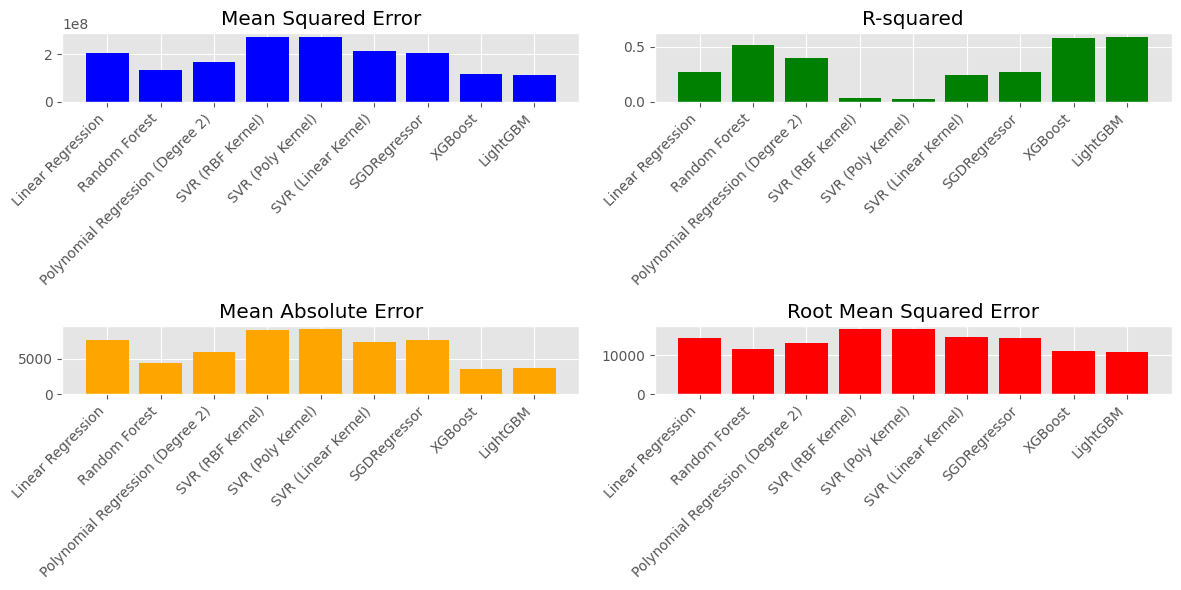

In [47]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('ggplot')

# Plot the Mean Squared Error
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.bar(results_df['Model'], results_df['Mean Squared Error'], color='blue')
plt.title('Mean Squared Error')
plt.xticks(rotation=45, ha='right')

# Plot the R-squared
plt.subplot(2, 2, 2)
plt.bar(results_df['Model'], results_df['R-squared'], color='green')
plt.title('R-squared')
plt.xticks(rotation=45, ha='right')

# Plot the Mean Absolute Error
plt.subplot(2, 2, 3)
plt.bar(results_df['Model'], results_df['Mean Absolute Error'], color='orange')
plt.title('Mean Absolute Error')
plt.xticks(rotation=45, ha='right')

# Plot the Root Mean Squared Error
plt.subplot(2, 2, 4)
plt.bar(results_df['Model'], results_df['Root Mean Squared Error'], color='red')
plt.title('Root Mean Squared Error')
plt.xticks(rotation=45, ha='right')

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


the Results demostrate that the bootstrap method are the best. They have the highest Results in R2 and minimize the other metrics